In [1]:
from collections import defaultdict
import numpy as np
import json
import glob, time, pickle, os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from scipy.constants import golden_ratio


In [2]:
def get_fig_size(width=7,scale=2.0):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = get_fig_size()
#mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times']})
#TexManager.font_info['iwona'] = ('iwona', r'\usepackage{iwona}')
#mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['lines.linewidth'] = 1.3
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
color_cycle_wong = ['#000000','#E69F00','#009E73','#56B4E9','#0072B2','#F0E442','#D55E00','#CC79A7']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_cycle_wong)

In [3]:
current_path = os.getcwd()
splt_path = current_path.split("/")
#top_path_idx = splt_path.index("nanograv")
top_path_idx = splt_path.index("akaiser")
#top_path_idx = splt_path.index("ark0015")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])

In [4]:
f = np.loadtxt('Parallaxes.txt', dtype = 'str', delimiter = '\n')

In [5]:
px_dict = {}
old_name = 'None'
new_name = 'New None'
for x in f:
    split_1 = x.split(' ')
    if split_1[0] == '!!psr':
        old_name = new_name
        
    if split_1[0] == 'JName':
        new_name = split_1[-1]
        px_dict[split_1[-1]] = defaultdict(list)
        
    if old_name != new_name:
        if split_1[0] == 'BName':
            if split_1[-1] != '=':
                px_dict[new_name][split_1[0]] = split_1[-1]
            else:
                px_dict[new_name][split_1[0]] = 'None'

        if 'PI' not in px_dict[new_name].keys():
            if split_1[0] in ['PI','eplus','eminus','RefURL']:
                px_dict[new_name][split_1[0]] = [split_1[-1]]
            elif split_1[0] == 'Refname':
                px_dict[new_name][split_1[0]] = [(' ').join(split_1[2:])]
            elif split_1[0] == 'Method':
                px_dict[new_name][split_1[0]] = [(' ').join(split_1[3:])]
        else:
            if split_1[0] in ['PI','eplus','eminus','RefURL']:
                px_dict[new_name][split_1[0]].append(split_1[-1])
            elif split_1[0] == 'Refname':
                px_dict[new_name][split_1[0]].append((' ').join(split_1[2:]))
            elif split_1[0] == 'Method':
                px_dict[new_name][split_1[0]].append((' ').join(split_1[3:]))

print(px_dict.keys())

dict_keys(['J0030+0451', 'J0034-0721', 'J0040+5716', 'J0045-7319', 'J0055+5117', 'J0102+6537', 'J0108-1431', 'J0108+6608', 'J0139+5814', 'J0147+5922', 'J0151-0635', 'J0152-1637', 'J0157+6212', 'J0218+4232', 'J0323+3944', 'J0332+5434', 'J0335+4555', 'J0337+1715', 'J0357+5236', 'J0358+5413', 'J0406+6138', 'J0437-4715', 'J0452-1759', 'J0454+5543', 'J0538+2817', 'J0601-0527', 'J0613-0200', 'J0614+2229', 'J0629+2415', 'J0630-2834', 'J0633+1746', 'J0636+5129', 'J0645+5158', 'J0659+1414', 'J0720-3125', 'J0729-1836', 'J0737-3039A/B', 'J0751+1807', 'J0814+7429', 'J0820-1350', 'J0823+0159', 'J0826+2637', 'J0835-4510', 'J0922+0638', 'J0953+0755', 'J1012+5307', 'J1017-7156', 'J1022+1001', 'J1023+0038', 'J1024-0719', 'J1045-4509', 'J1048+2339', 'J1136+1551', 'J1227-4853', 'J1239+2453', 'J1257-1027', 'J1300+1240', 'J1302-6350', 'J1321+8323', 'J1417-4402', 'J1431-4715', 'J1455-3330', 'J1456-6843', 'J1509+5531', 'J1532+2745', 'J1537+1155', 'J1543+0929', 'J1543-0620', 'J1559-4438', 'J1600-3053', 'J1607

In [6]:
"""with open('parallaxes.json', 'w') as fp:
    json.dump(px_dict, fp, sort_keys=True, indent=4)"""

"with open('parallaxes.json', 'w') as fp:\n    json.dump(px_dict, fp, sort_keys=True, indent=4)"

In [7]:
astrometric_px_file = 'parallaxes.json'
astrometric_px = {}
with open(astrometric_px_file, 'r') as pxf:
    astrometric_px = json.load(pxf)
    pxf.close()

In [8]:
print(astrometric_px.keys())

dict_keys(['J0030+0451', 'J0034-0721', 'J0040+5716', 'J0045-7319', 'J0055+5117', 'J0102+6537', 'J0108+6608', 'J0108-1431', 'J0139+5814', 'J0147+5922', 'J0151-0635', 'J0152-1637', 'J0157+6212', 'J0218+4232', 'J0323+3944', 'J0332+5434', 'J0335+4555', 'J0337+1715', 'J0357+5236', 'J0358+5413', 'J0406+6138', 'J0437-4715', 'J0452-1759', 'J0454+5543', 'J0538+2817', 'J0601-0527', 'J0613-0200', 'J0614+2229', 'J0629+2415', 'J0630-2834', 'J0633+1746', 'J0636+5129', 'J0645+5158', 'J0659+1414', 'J0720-3125', 'J0729-1836', 'J0737-3039A/B', 'J0751+1807', 'J0814+7429', 'J0820-1350', 'J0823+0159', 'J0826+2637', 'J0835-4510', 'J0922+0638', 'J0953+0755', 'J1012+5307', 'J1017-7156', 'J1022+1001', 'J1023+0038', 'J1024-0719', 'J1045-4509', 'J1048+2339', 'J1136+1551', 'J1227-4853', 'J1239+2453', 'J1257-1027', 'J1300+1240', 'J1302-6350', 'J1321+8323', 'J1417-4402', 'J1431-4715', 'J1455-3330', 'J1456-6843', 'J1509+5531', 'J1532+2745', 'J1537+1155', 'J1543+0929', 'J1543-0620', 'J1559-4438', 'J1600-3053', 'J1607

# 5yr pxs

In [9]:
parfiles_5yr = sorted(glob.glob(top_dir + "/5yr/par/*.par"))
px_par_5yr = {}
for pf in parfiles_5yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_5yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_5yr[psr]['val'] = np.float128(splt_line[1])
                px_par_5yr[psr]['err'] = np.float128(splt_line[-1])

# 9yr pxs

In [10]:
parfiles_9yr = sorted(glob.glob(top_dir + "/9yr/par/*.par"))
px_par_9yr = {}
for pf in parfiles_9yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_9yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_9yr[psr]['val'] = np.float128(splt_line[1])
                px_par_9yr[psr]['err'] = np.float128(splt_line[-1])

# 11yr pxs

In [11]:
parfiles_11yr = sorted(glob.glob(top_dir + "/11yr/par/*.par"))
px_par_11yr = {}
for pf in parfiles_11yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_11yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_11yr[psr]['val'] = np.float128(splt_line[1])
                px_par_11yr[psr]['err'] = np.float128(splt_line[-1])

# 12.5yr pxs

In [12]:
parfiles_12p5yr = sorted(glob.glob(top_dir + "/12p5yr/par/*.par"))
px_par_12p5yr = {}
for pf in parfiles_12p5yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_12p5yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_12p5yr[psr]['val'] = np.float128(splt_line[1])
                px_par_12p5yr[psr]['err'] = np.float128(splt_line[-1])

# Plots

In [13]:
all_psrs = []
for psr in px_par_12p5yr.keys():
    all_psrs.append(psr)
for psr in px_par_5yr.keys():
    if psr not in all_psrs:
        print('5yr',psr)
        all_psrs.append(psr)
for psr in px_par_9yr.keys():
    if psr not in all_psrs:
        print('9yr',psr)
        all_psrs.append(psr)
for psr in px_par_11yr.keys():
    if psr not in all_psrs:
        print('11yr',psr)
        all_psrs.append(psr)

5yr J1853+1308
9yr J1949+3106


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


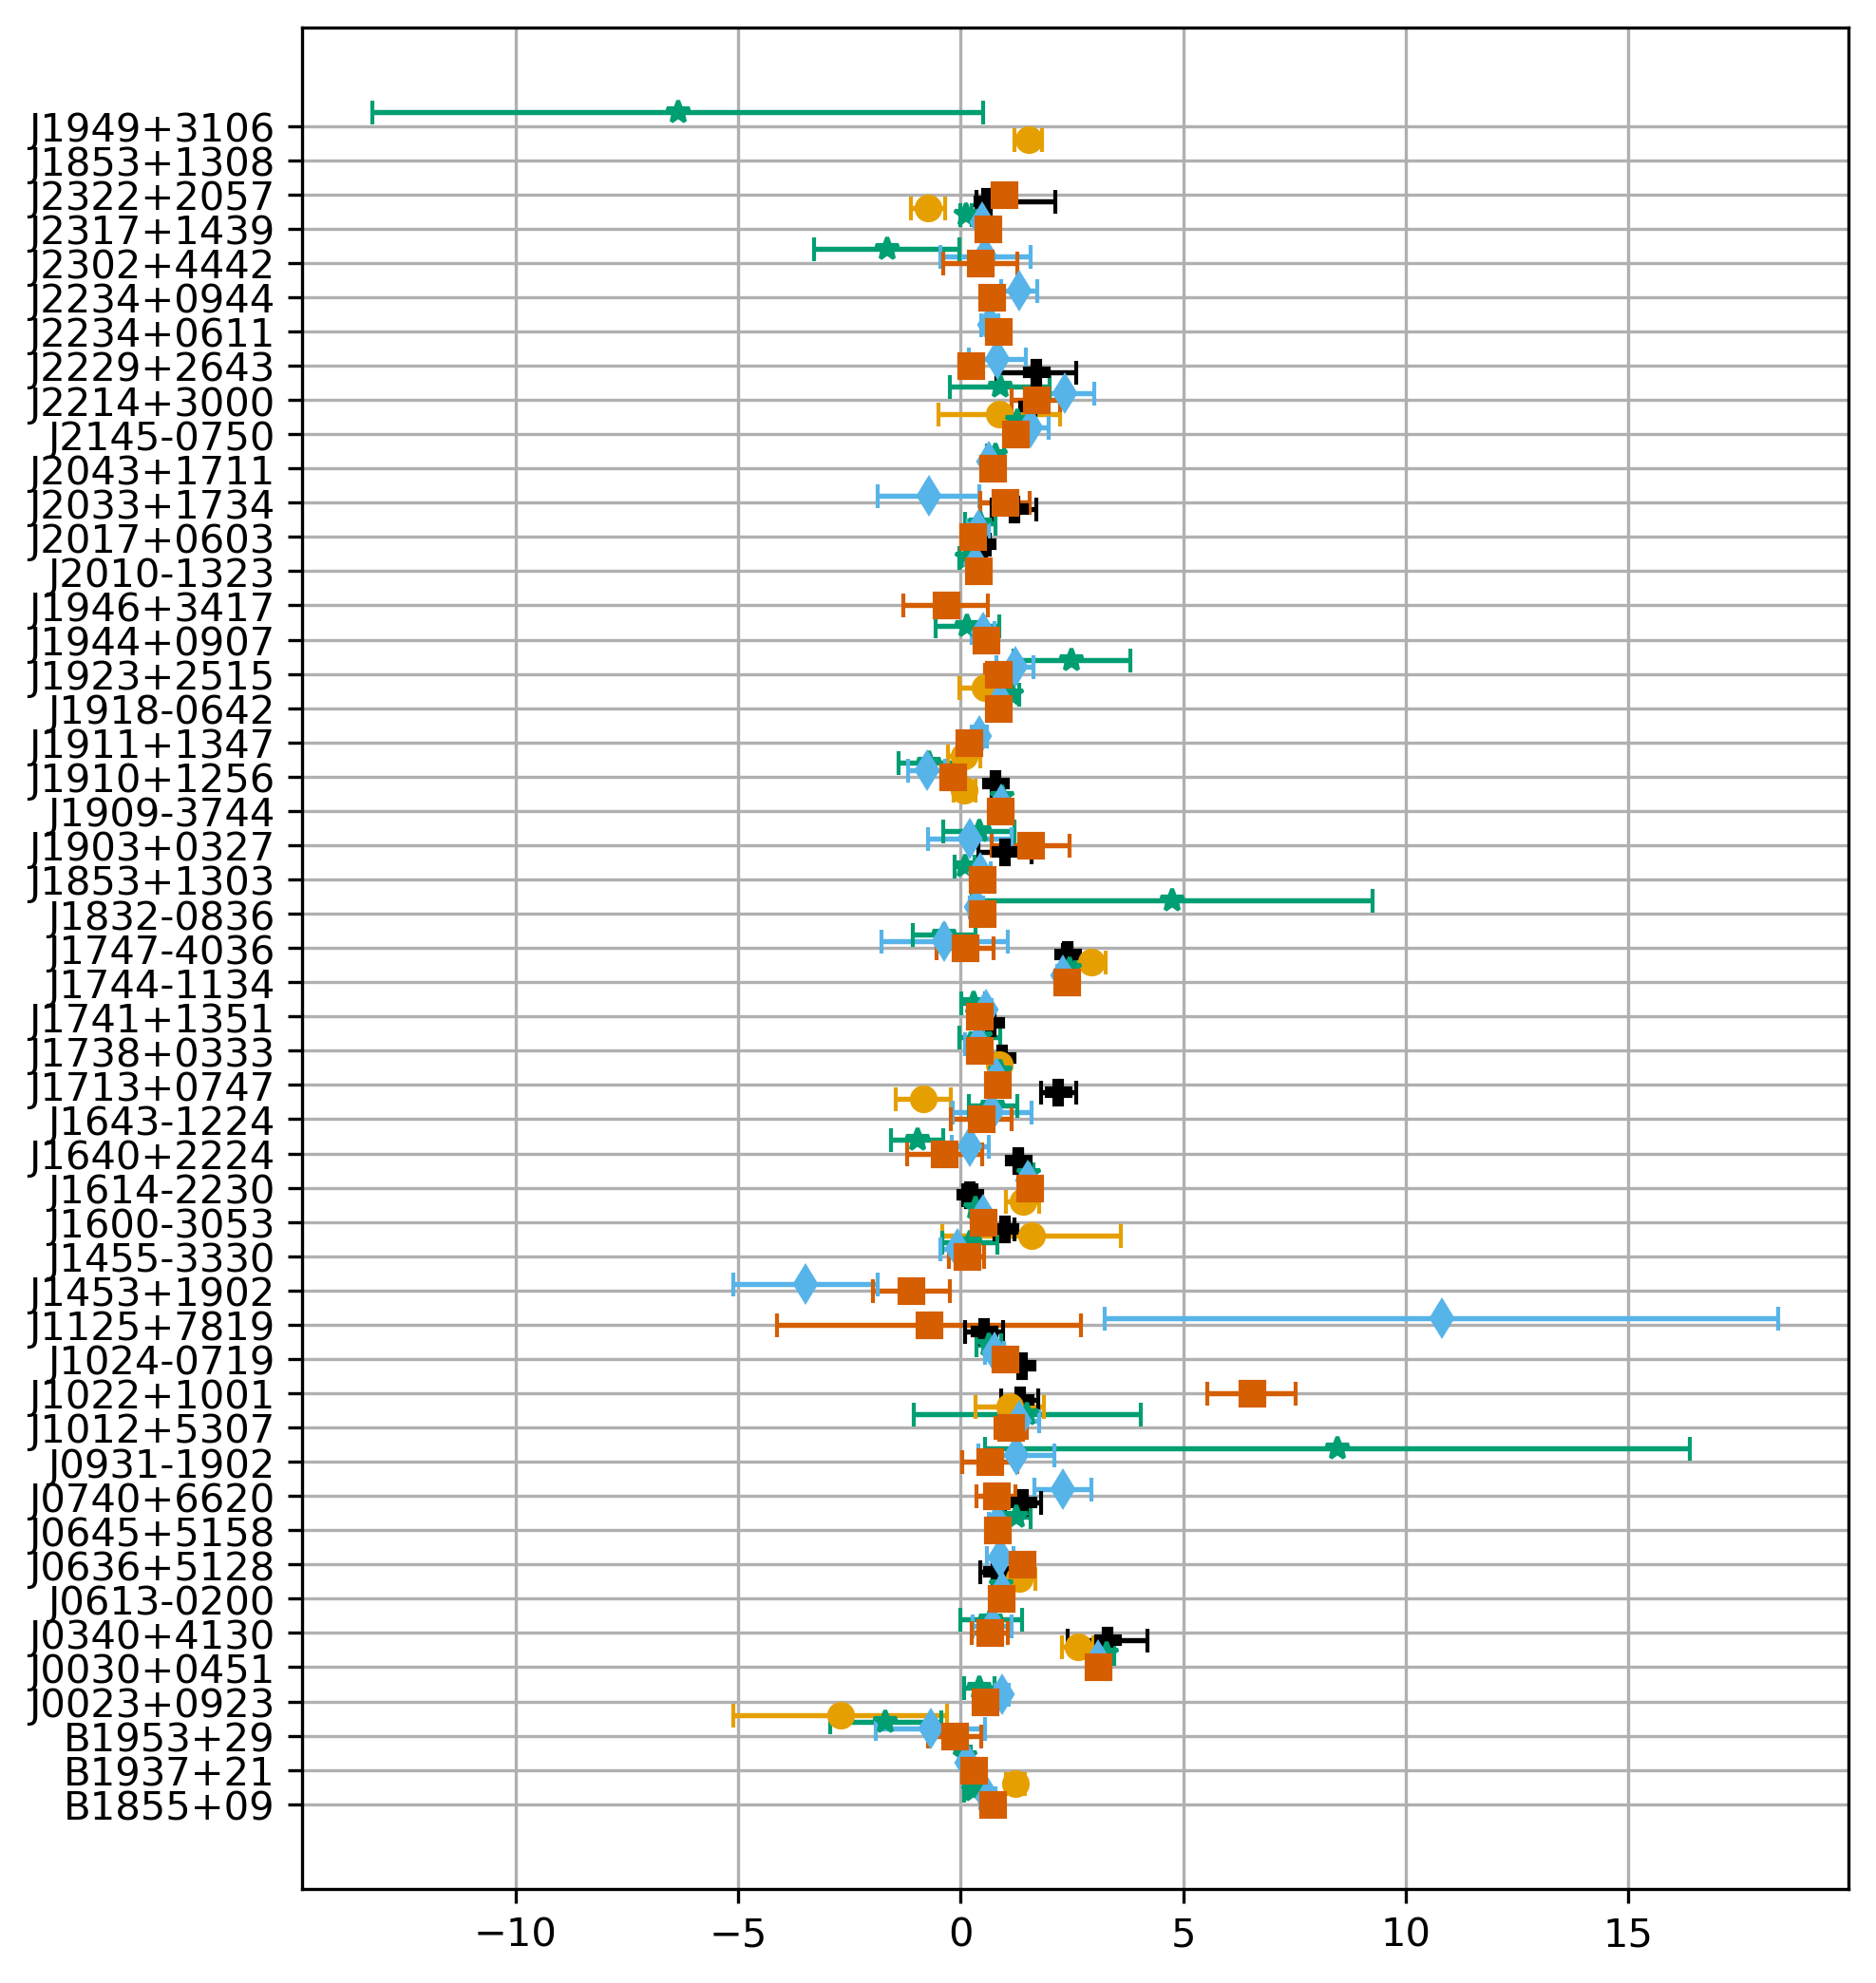

In [14]:
plt.figure(figsize=get_fig_size(scale=.5))
capsize = 3
plotted_psrs = []
i = 0
for i,psr in enumerate(all_psrs):
    if psr in astrometric_px.keys():
        plt.errorbar(float(astrometric_px[psr]['PI'][0]),i+.8,
                     xerr=[np.array([np.abs(float(astrometric_px[psr]['eminus'][0]))]),
                           [np.abs(float(astrometric_px[psr]['eplus'][0]))]],
                     fmt = 'P', capsize = capsize, color = 'C0')
    if psr in px_par_5yr.keys():
        if 'val' in px_par_5yr[psr].keys() and 'err' in px_par_5yr[psr].keys():
            plt.errorbar(px_par_5yr[psr]['val'],i+.6,xerr=px_par_5yr[psr]['err'],
                         fmt = 'o', capsize = capsize, color = 'C1')
    if psr in px_par_9yr.keys():
        if 'val' in px_par_9yr[psr].keys() and 'err' in px_par_9yr[psr].keys():
            plt.errorbar(px_par_9yr[psr]['val'],i+.4,xerr=px_par_9yr[psr]['err'],
                         fmt = '*', capsize = capsize, color = 'C2')
    if psr in px_par_11yr.keys():
        if 'val' in px_par_11yr[psr].keys() and 'err' in px_par_11yr[psr].keys():
            plt.errorbar(px_par_11yr[psr]['val'],i+.2,xerr=px_par_11yr[psr]['err'],
                         fmt = 'd', capsize = capsize, color = 'C3')
    if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            plt.errorbar(px_par_12p5yr[psr]['val'],i,xerr=px_par_12p5yr[psr]['err'],
                         fmt = 's', capsize = capsize, color = 'C6')
plt.yticks(np.arange(0,len(all_psrs)), all_psrs)
plt.grid(True, which = 'both')
plt.show()

In [15]:
print(px_par_5yr['B1855+09'])

{'val': 1.2288569063263405232, 'err': 0.21243361289239687251}


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


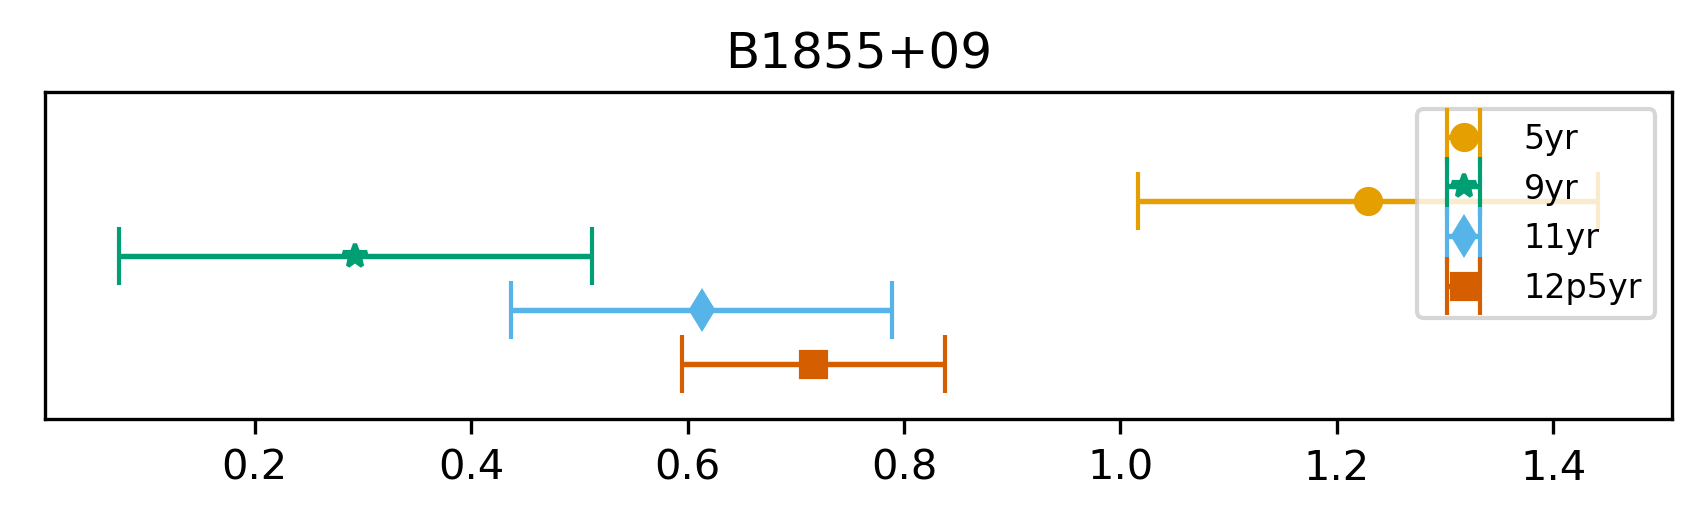

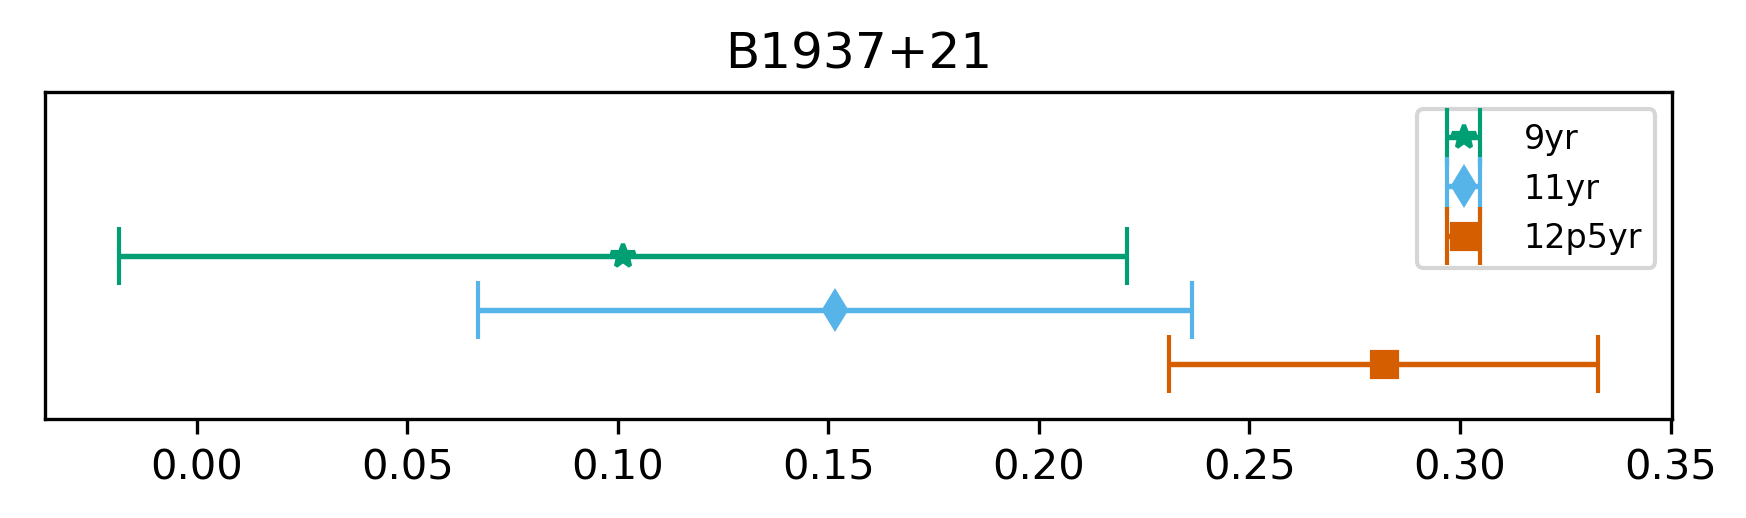

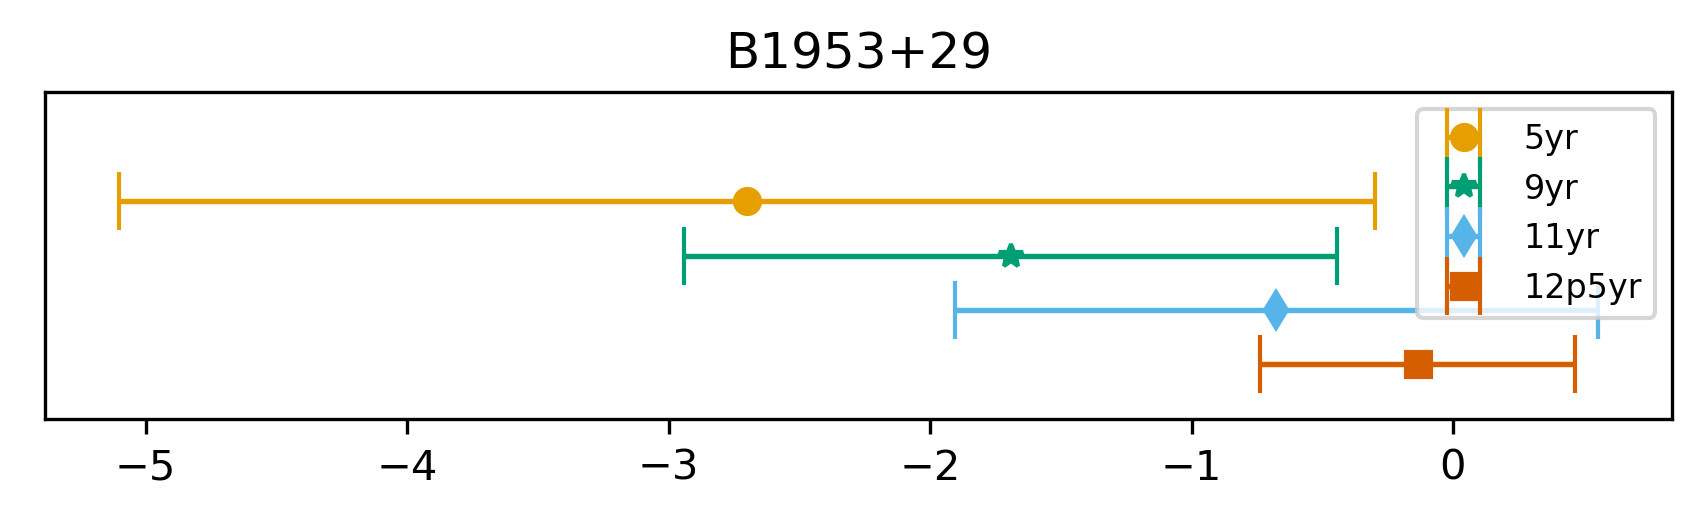

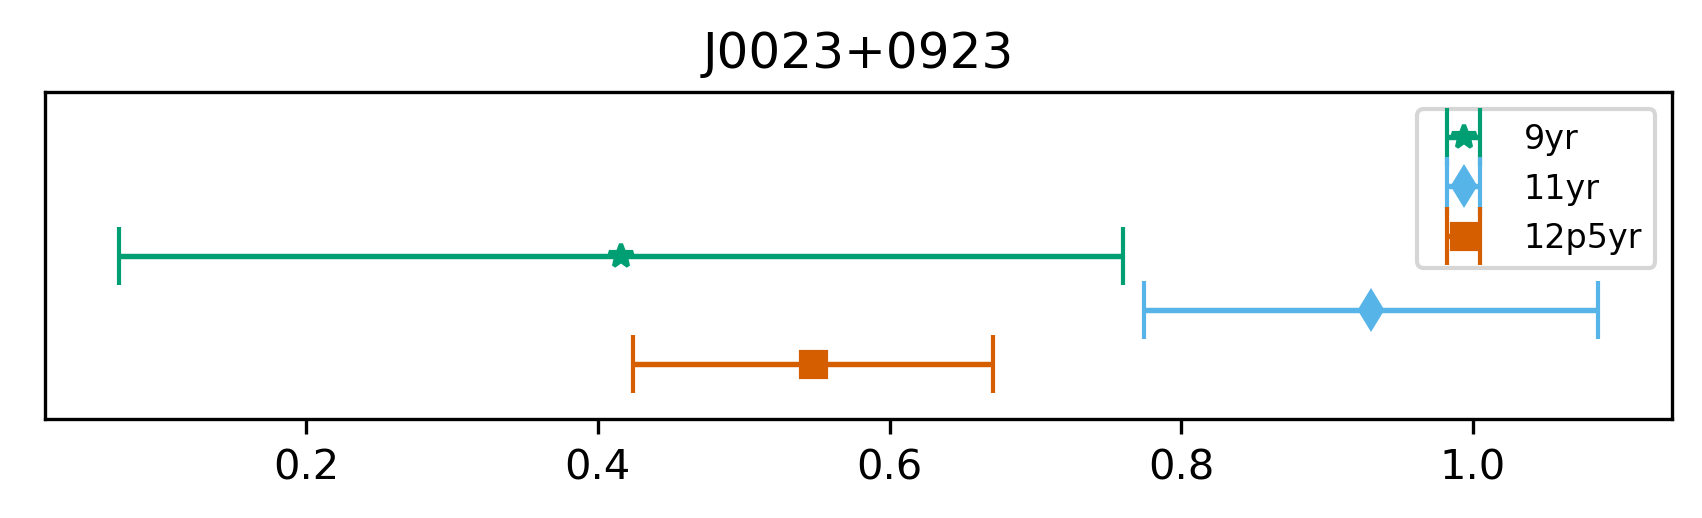

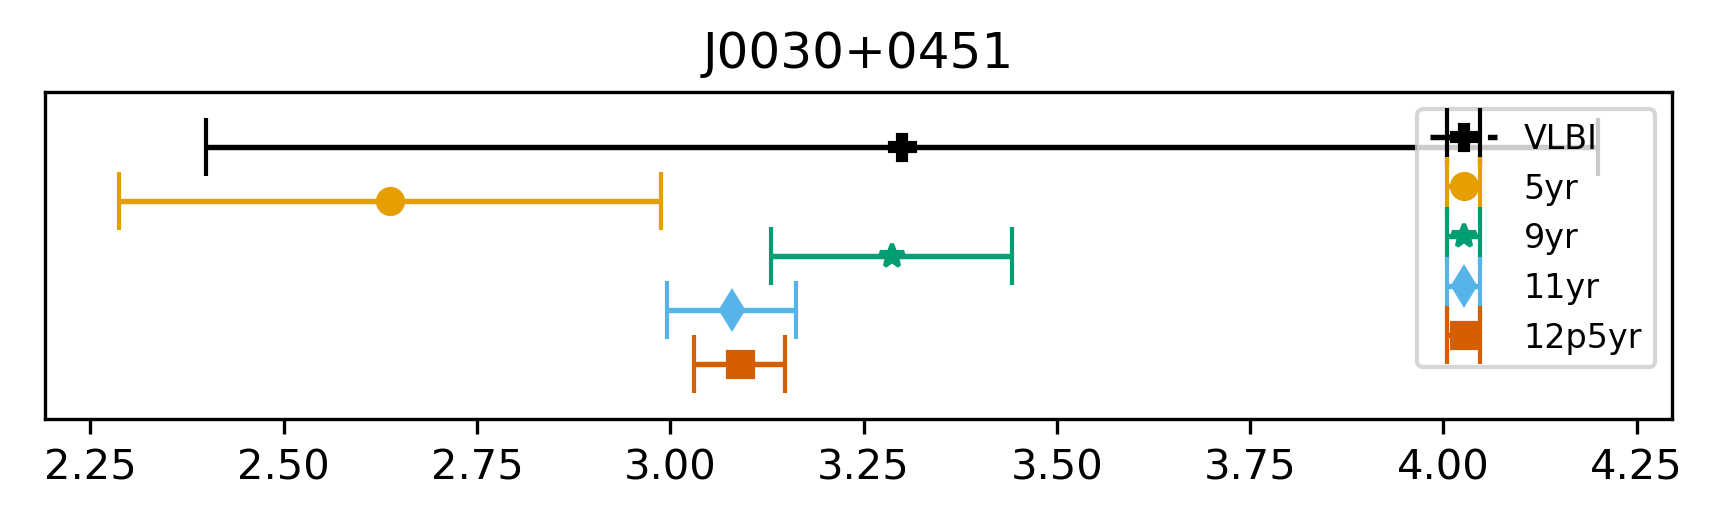

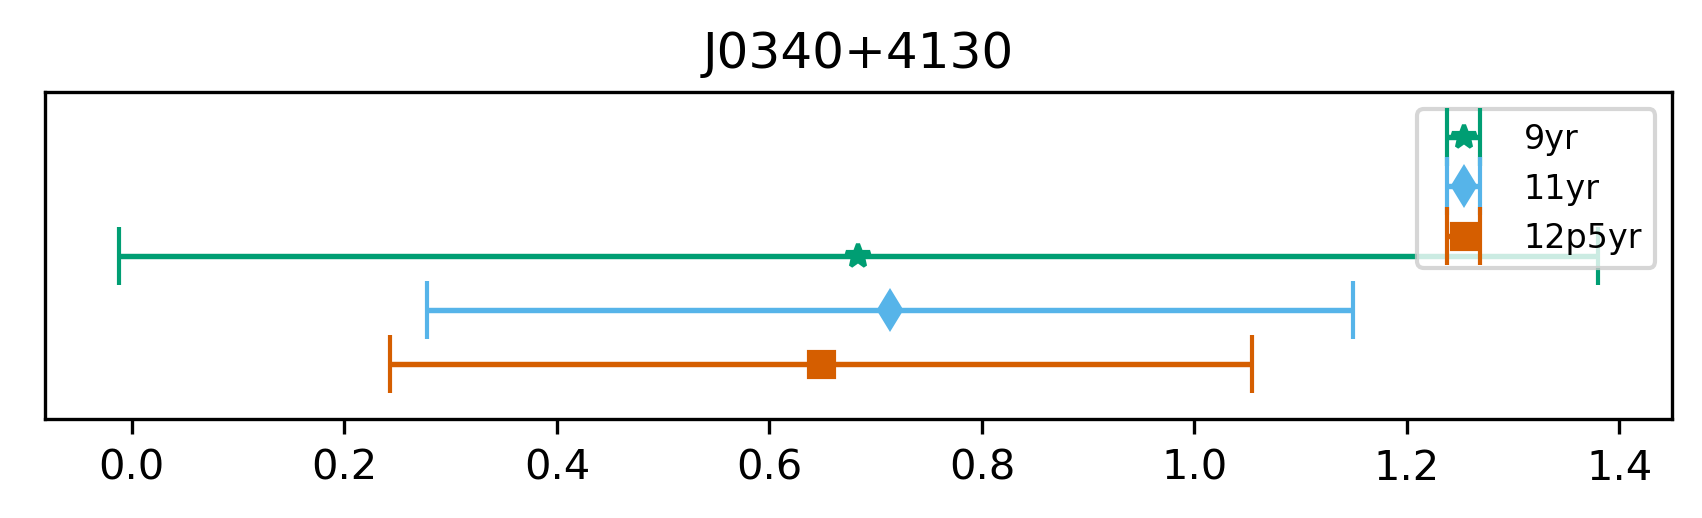

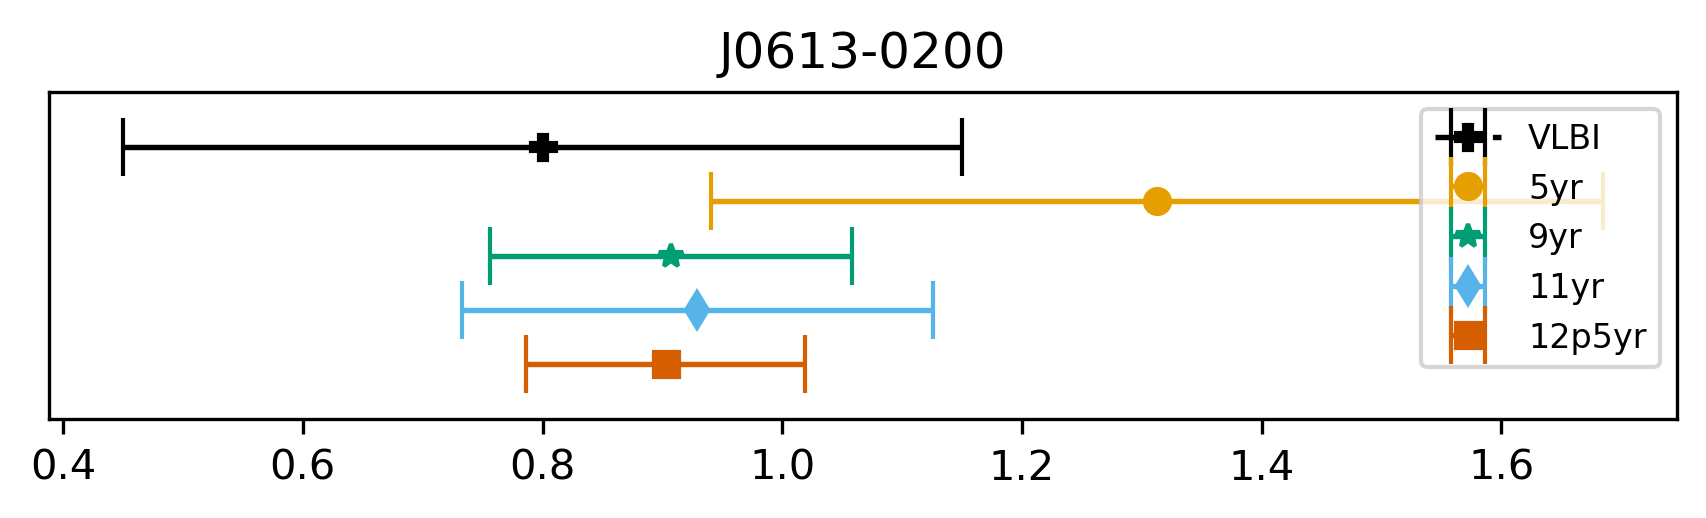

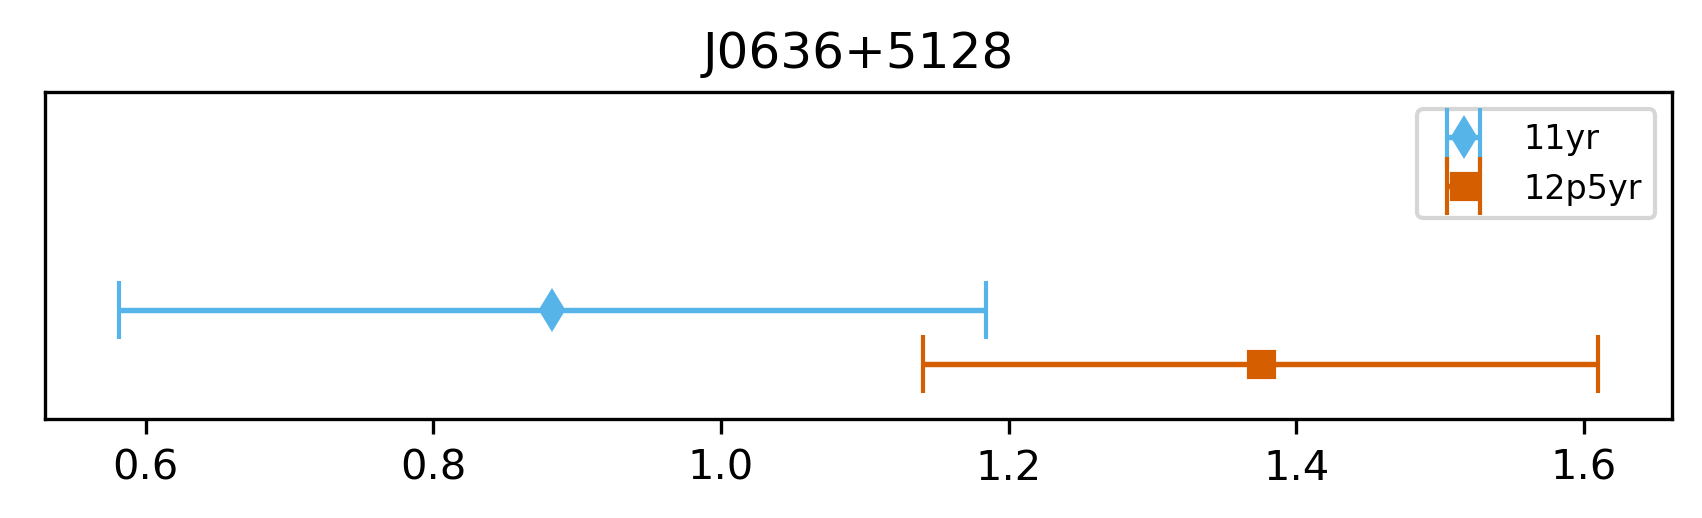

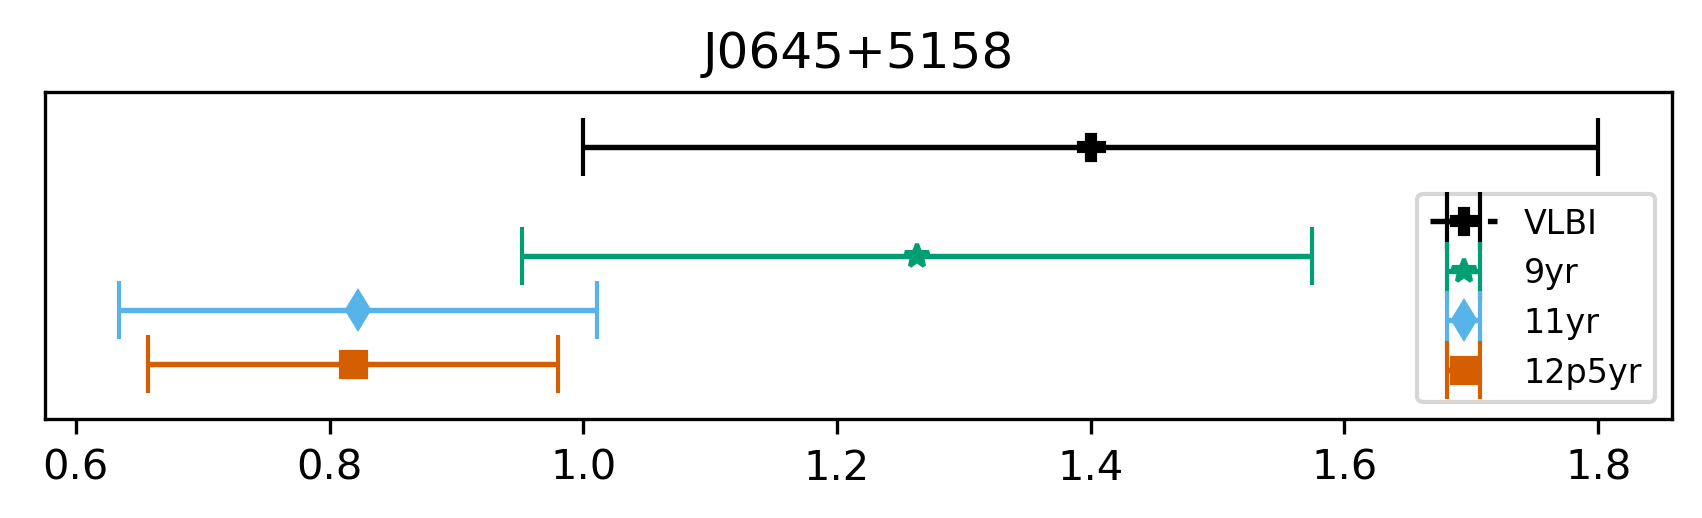

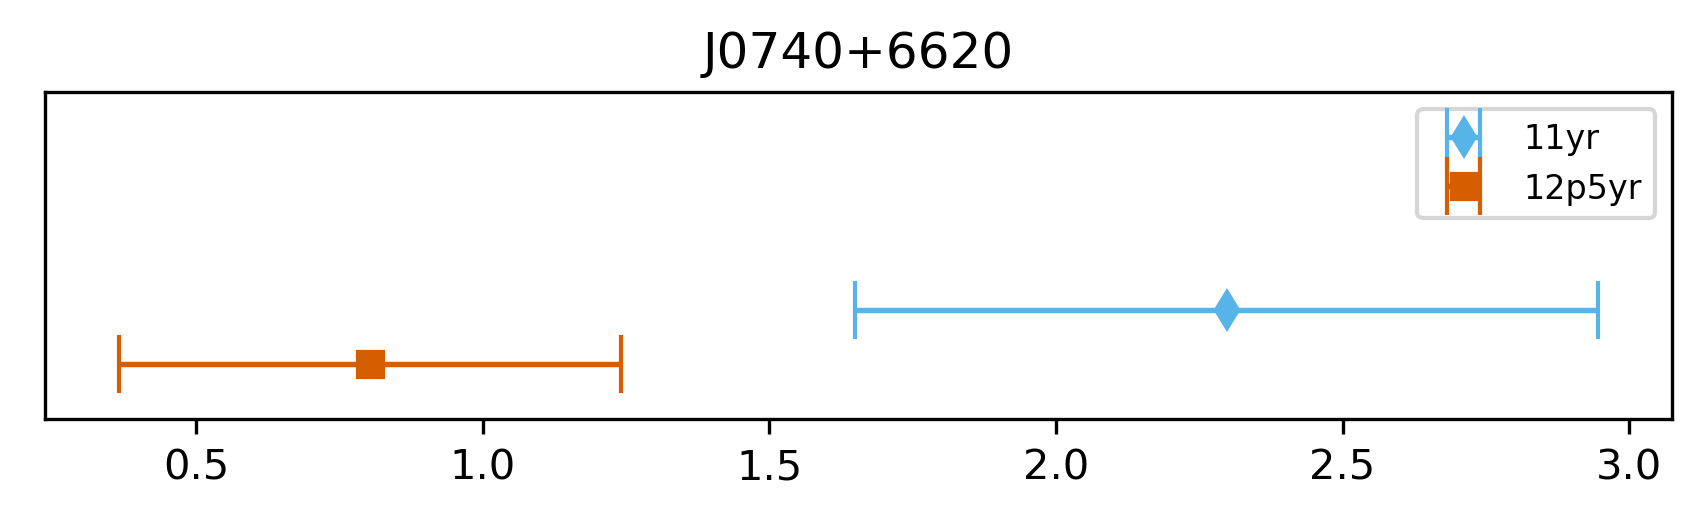

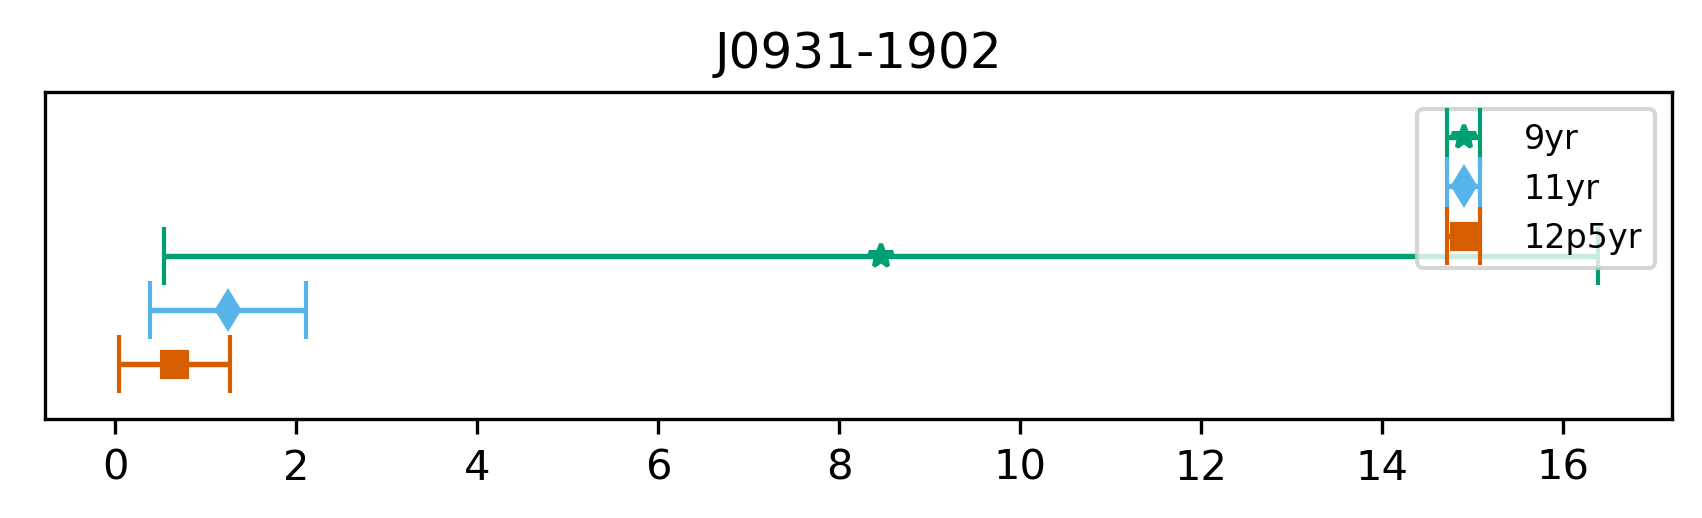

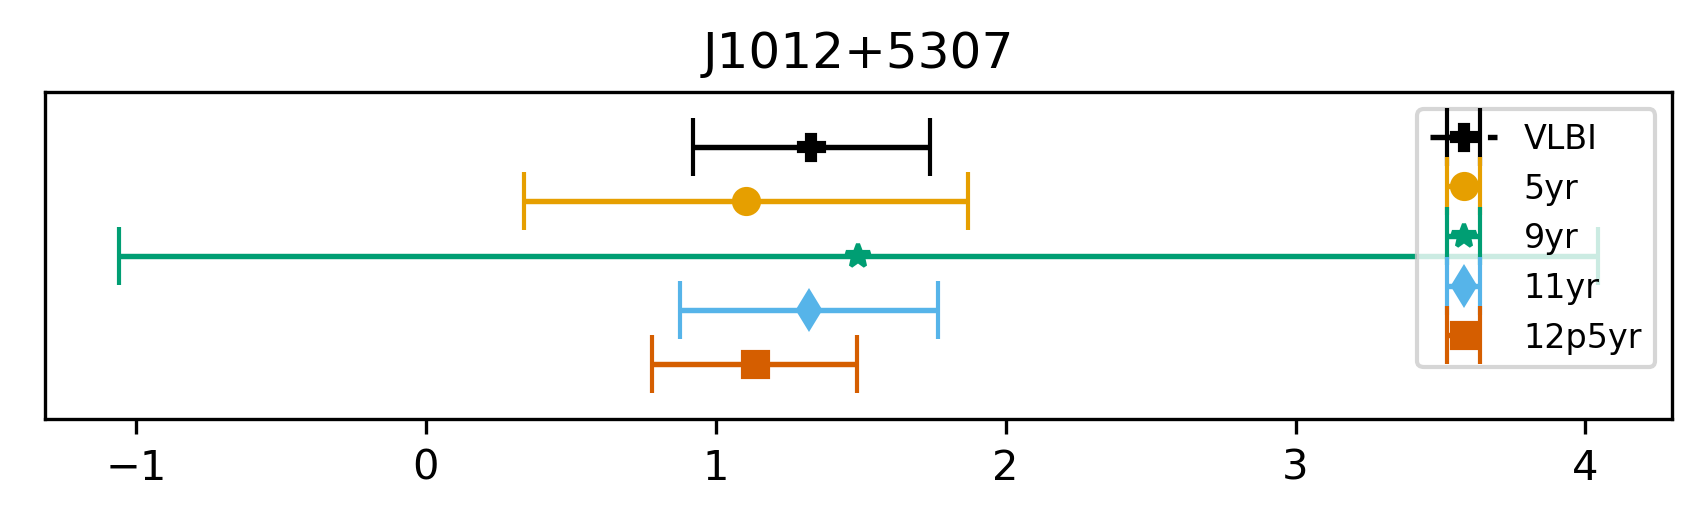

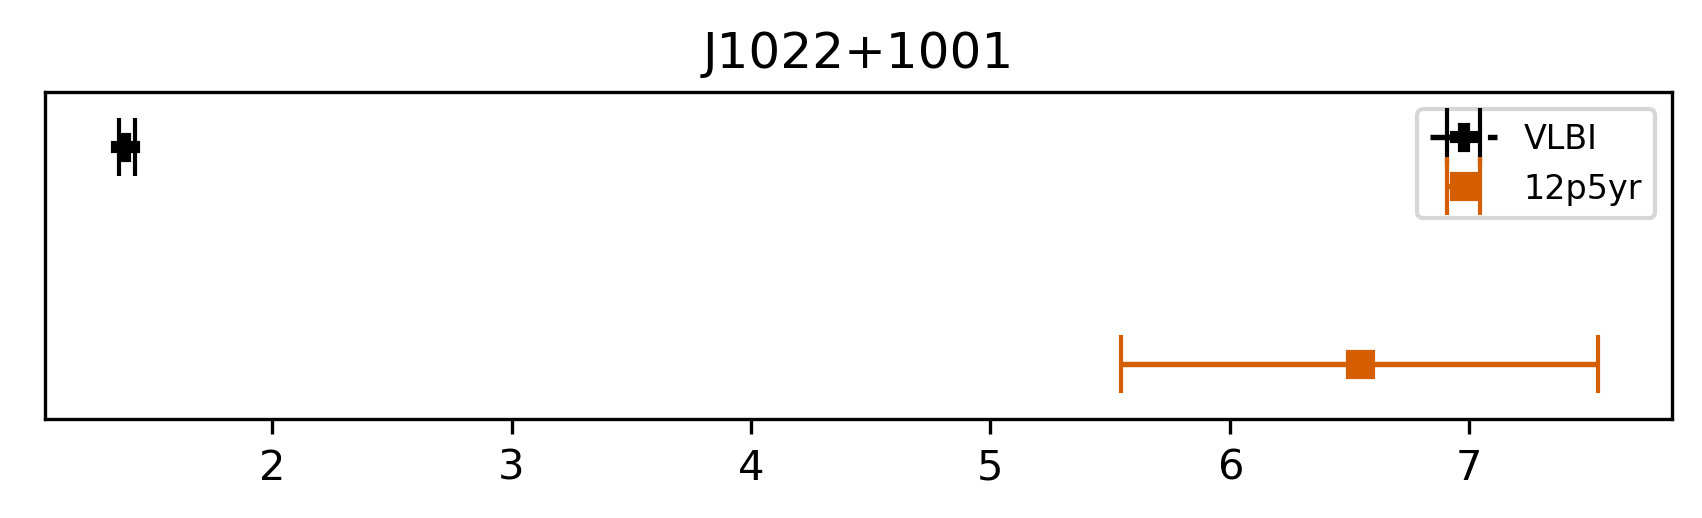

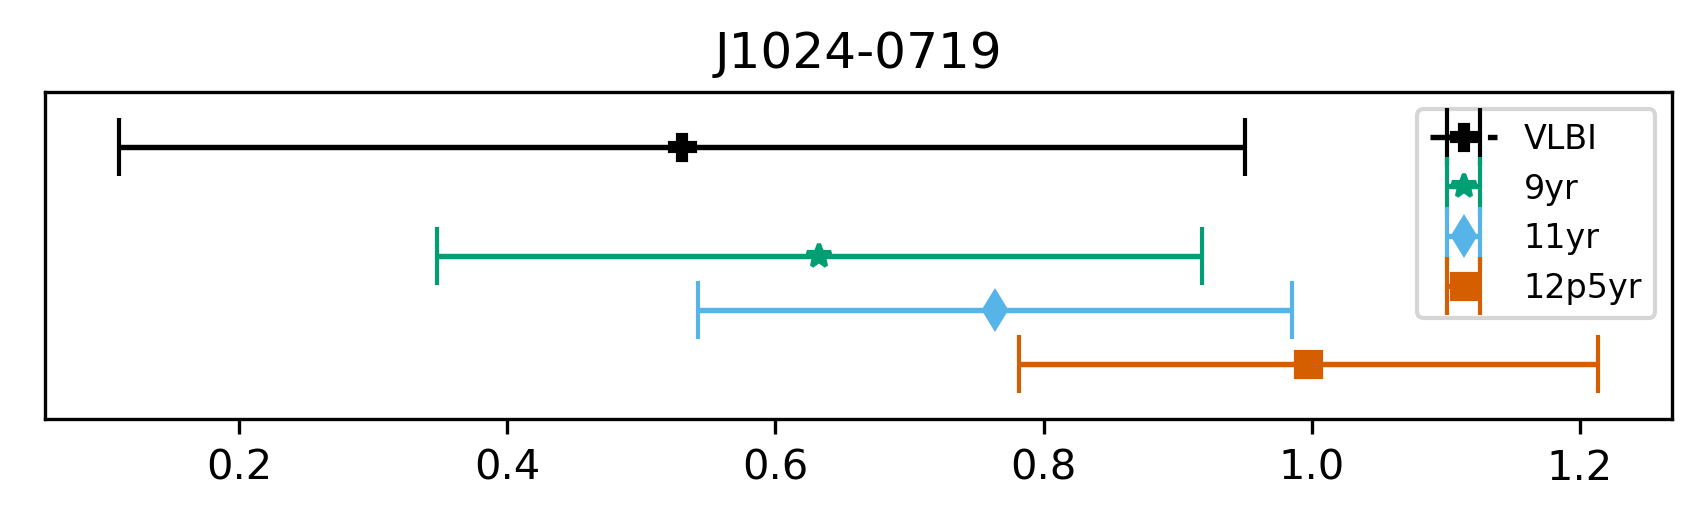

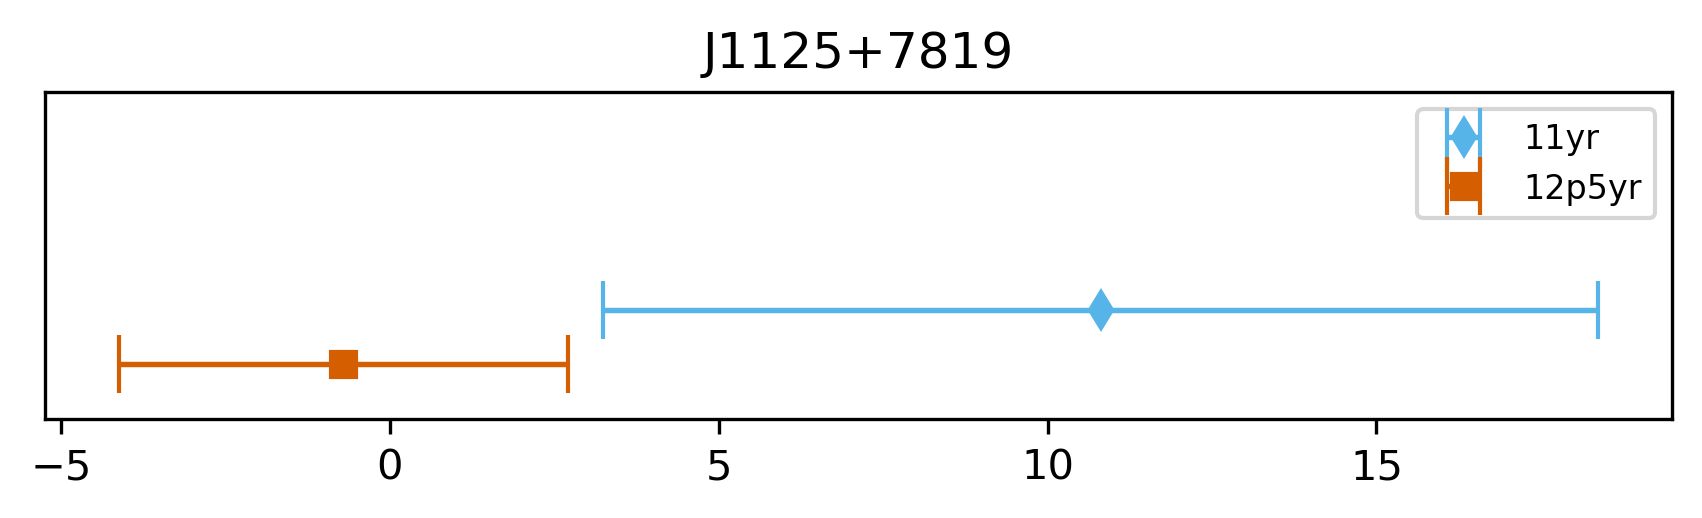

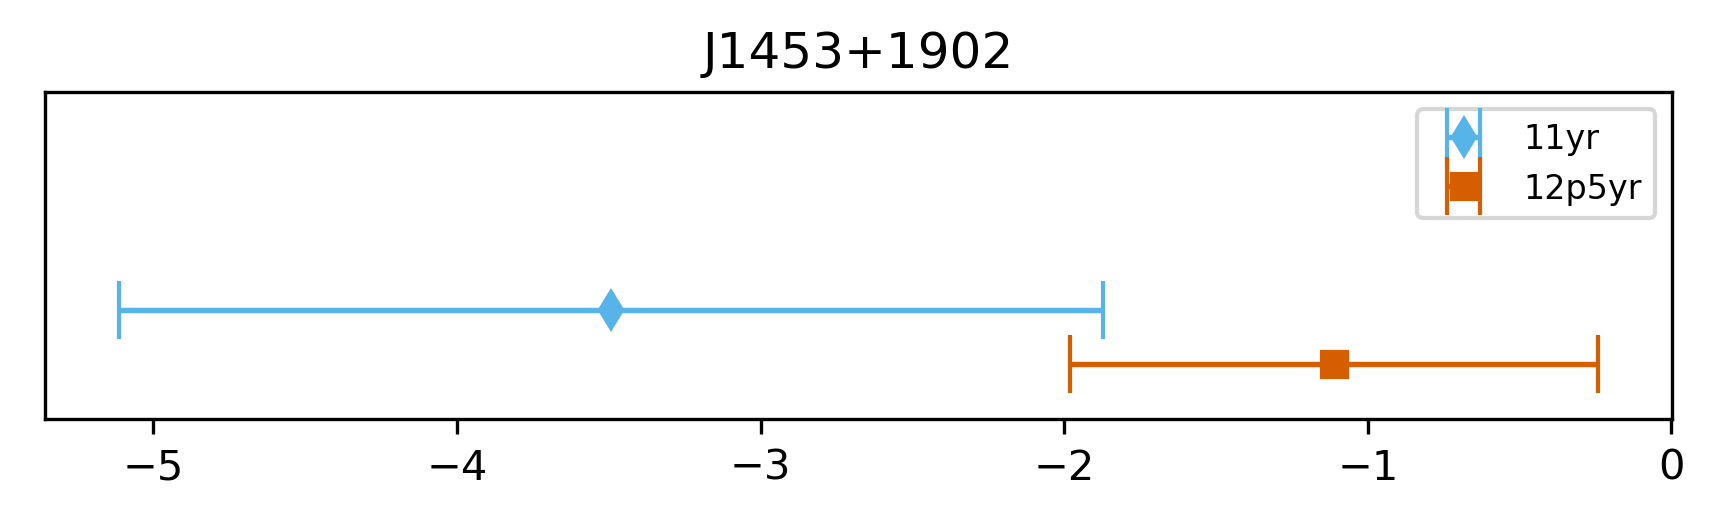

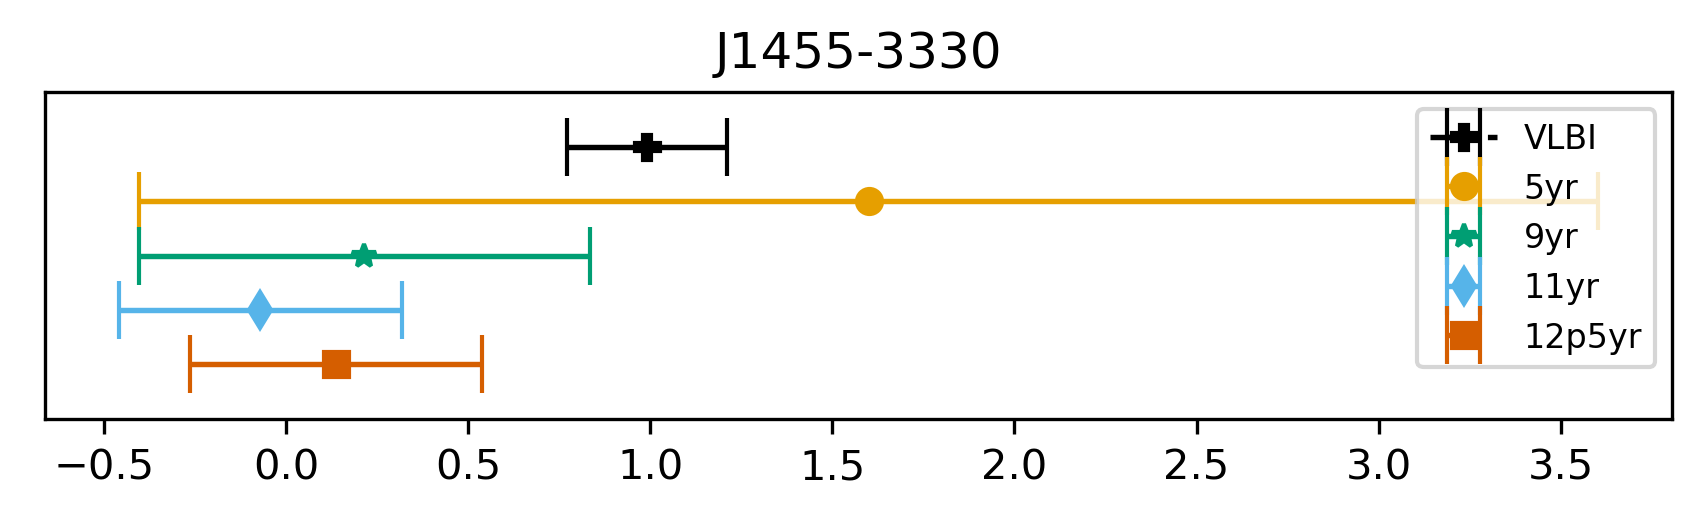

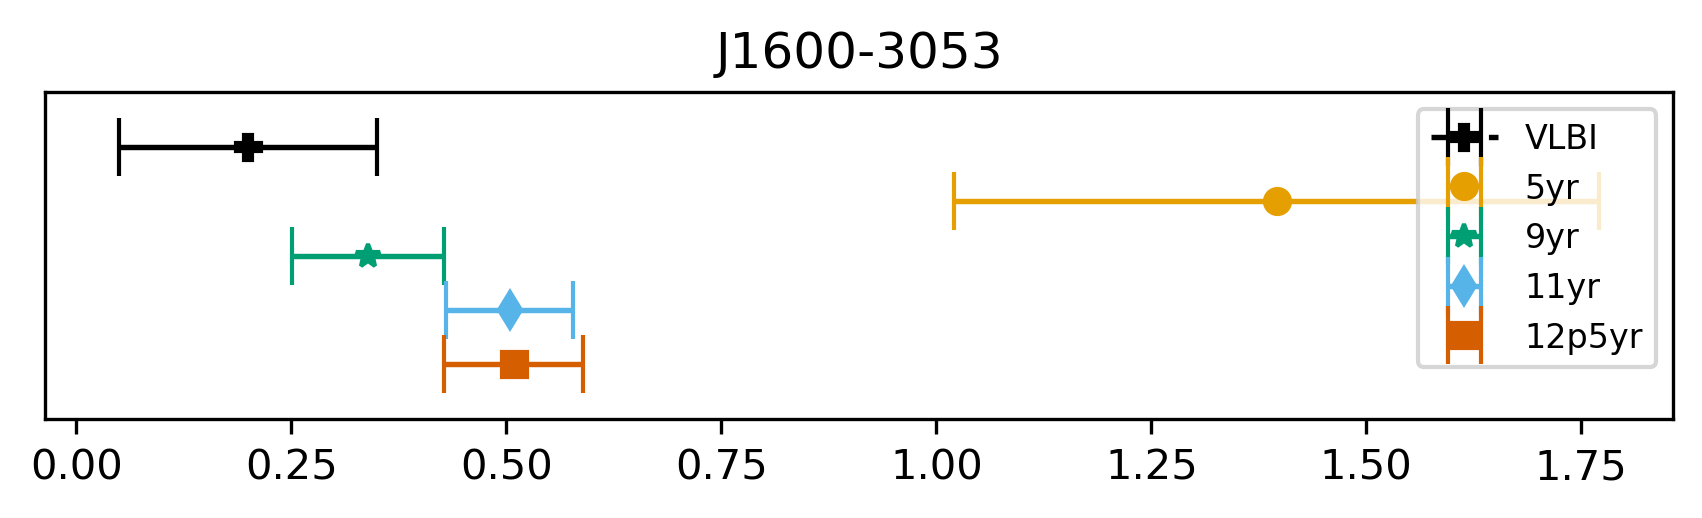

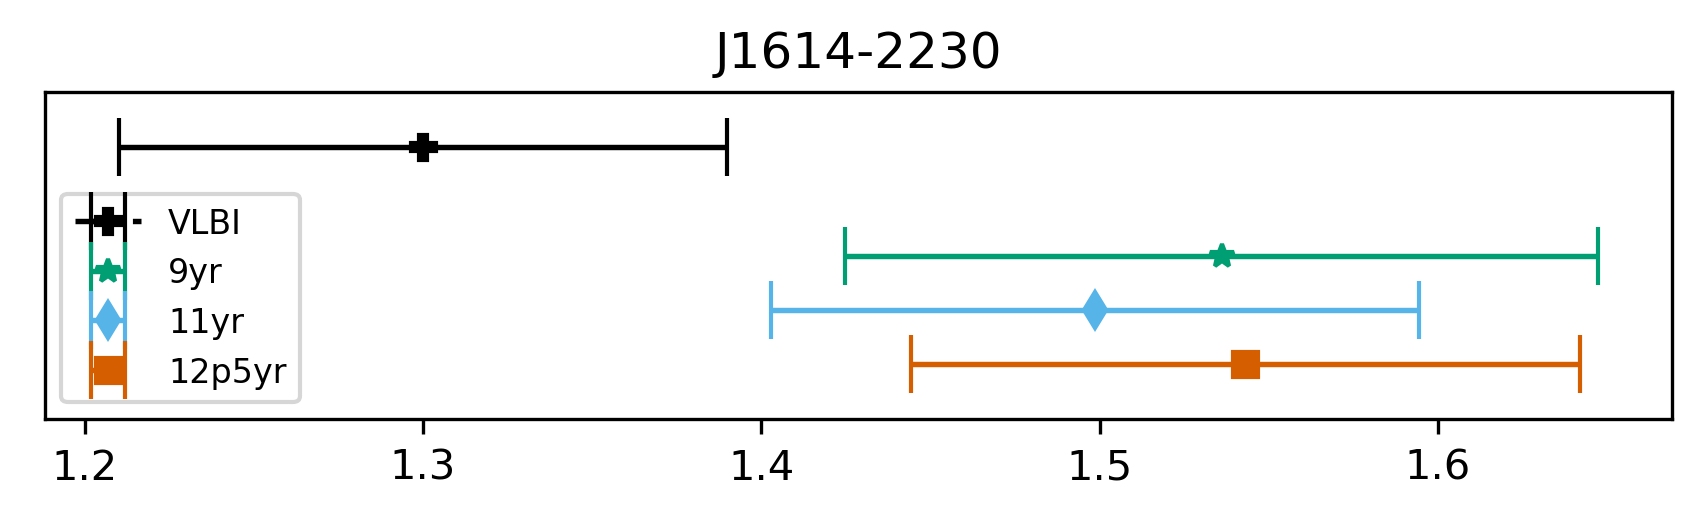

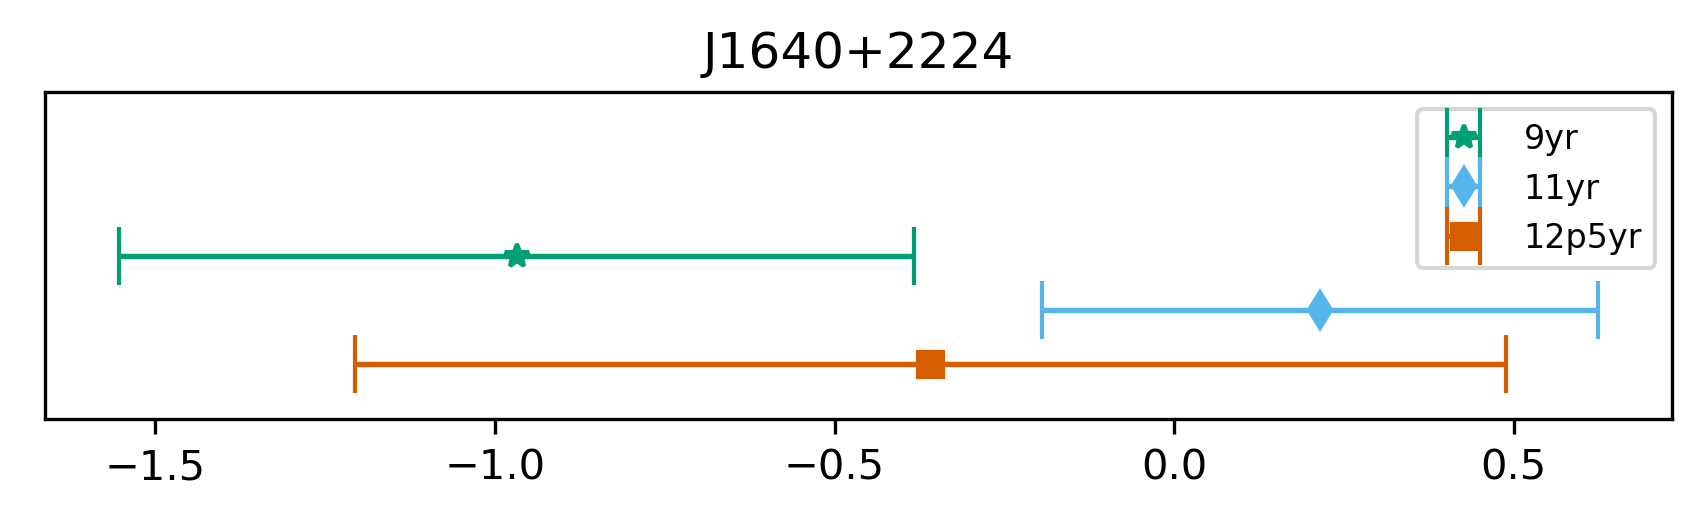

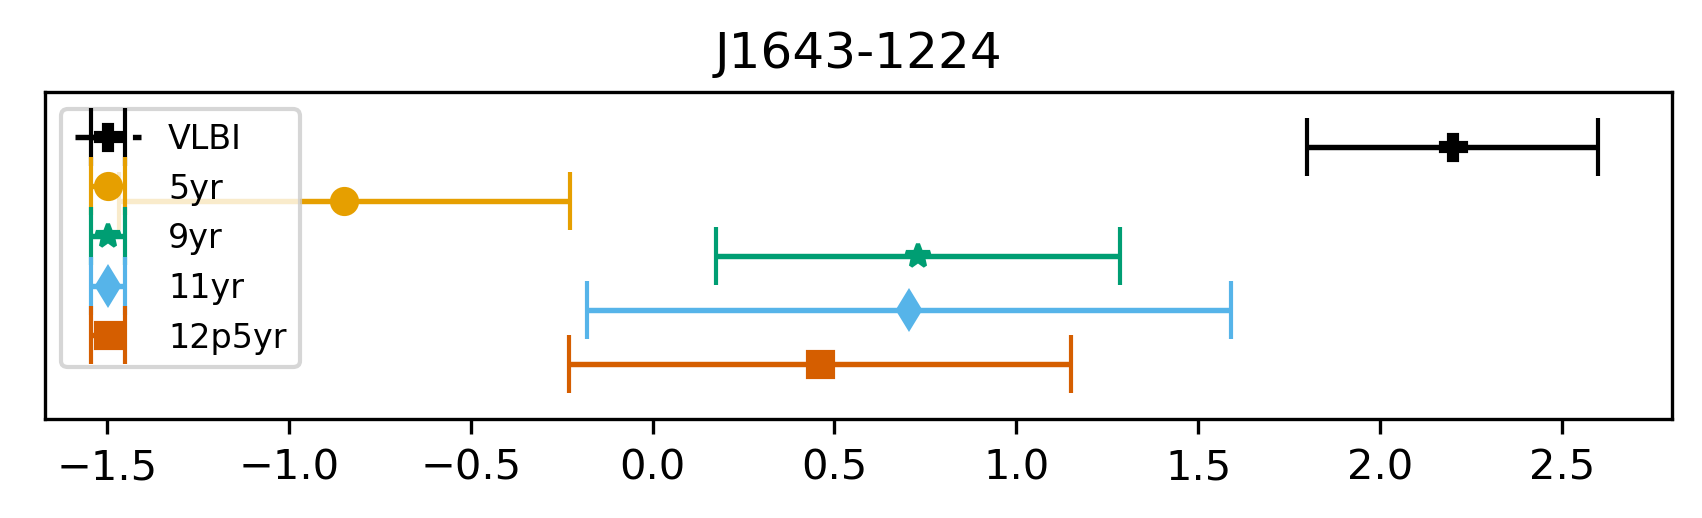

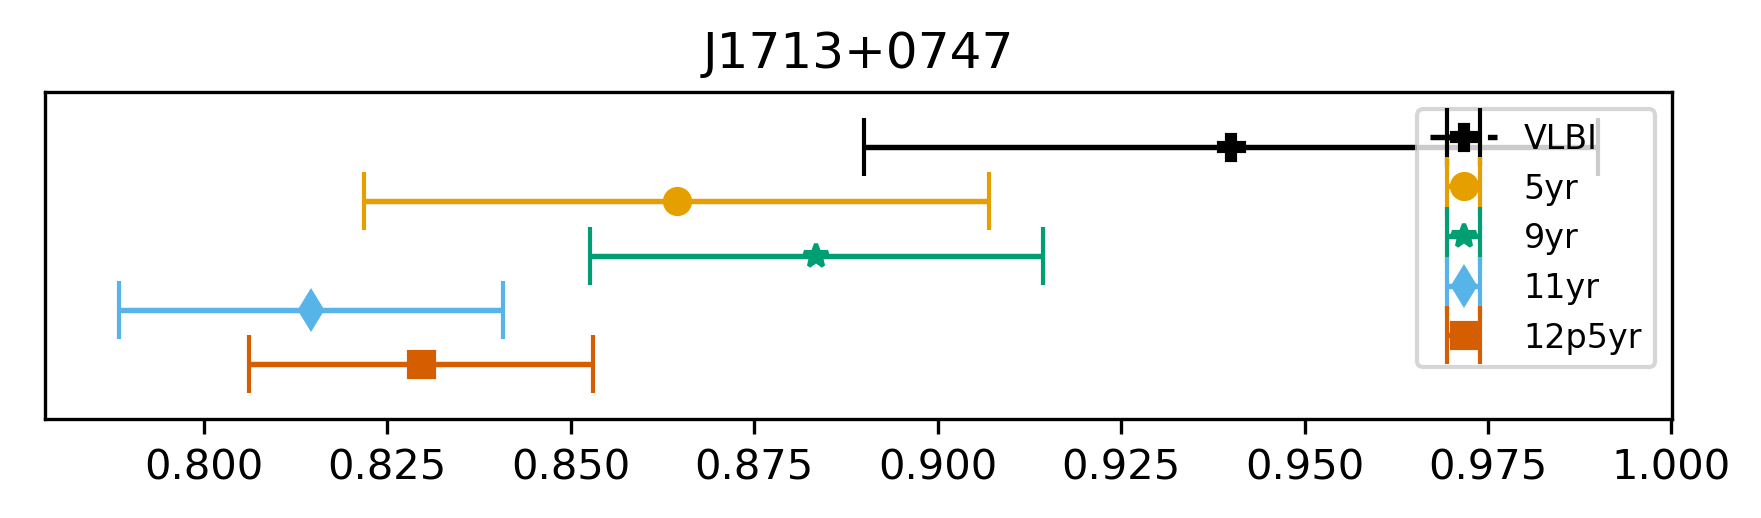

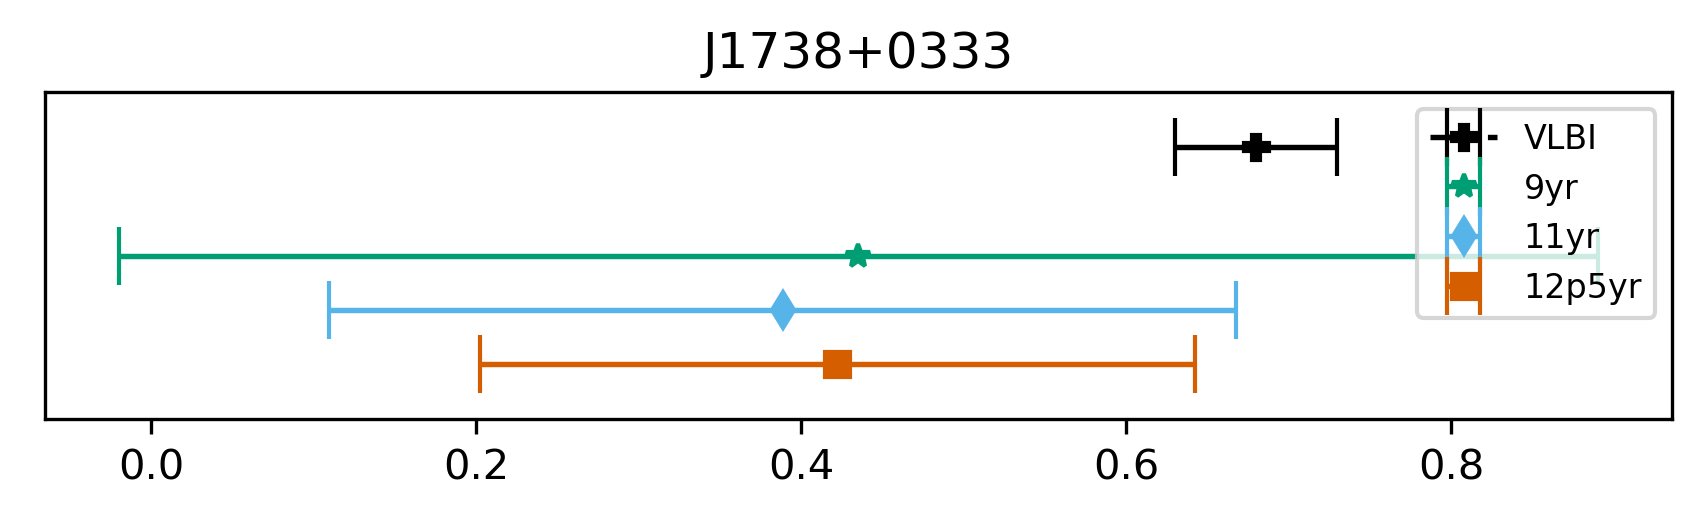

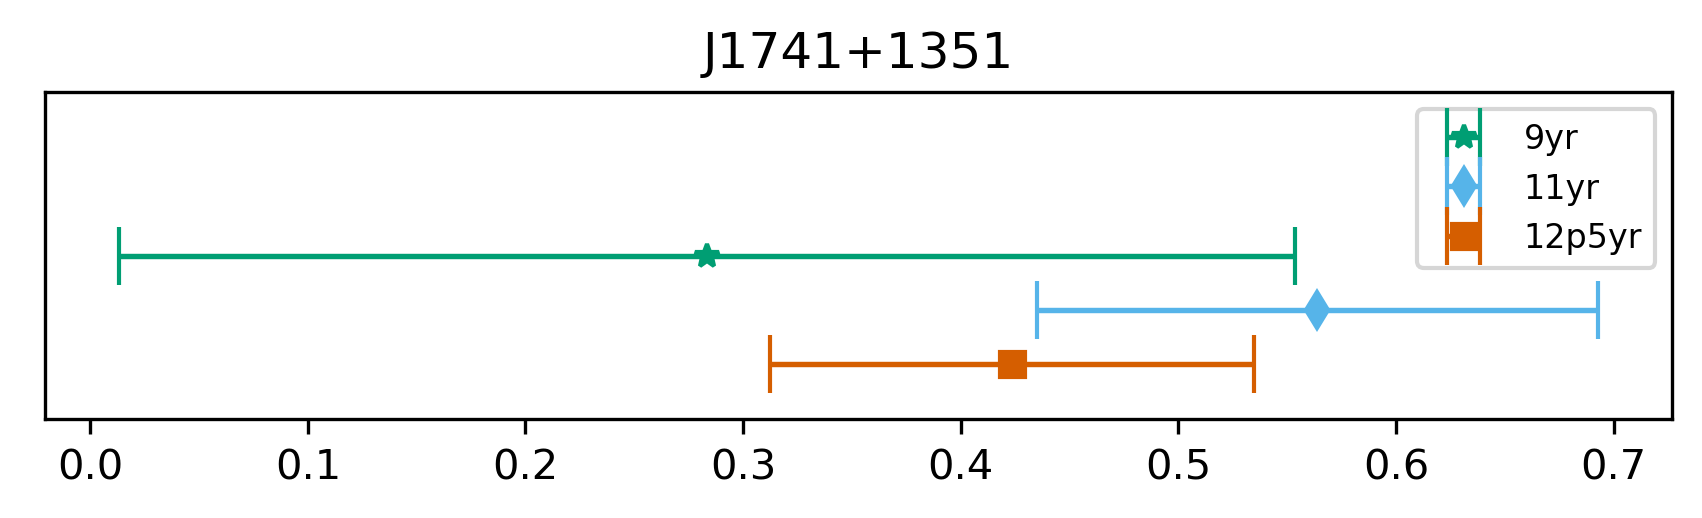

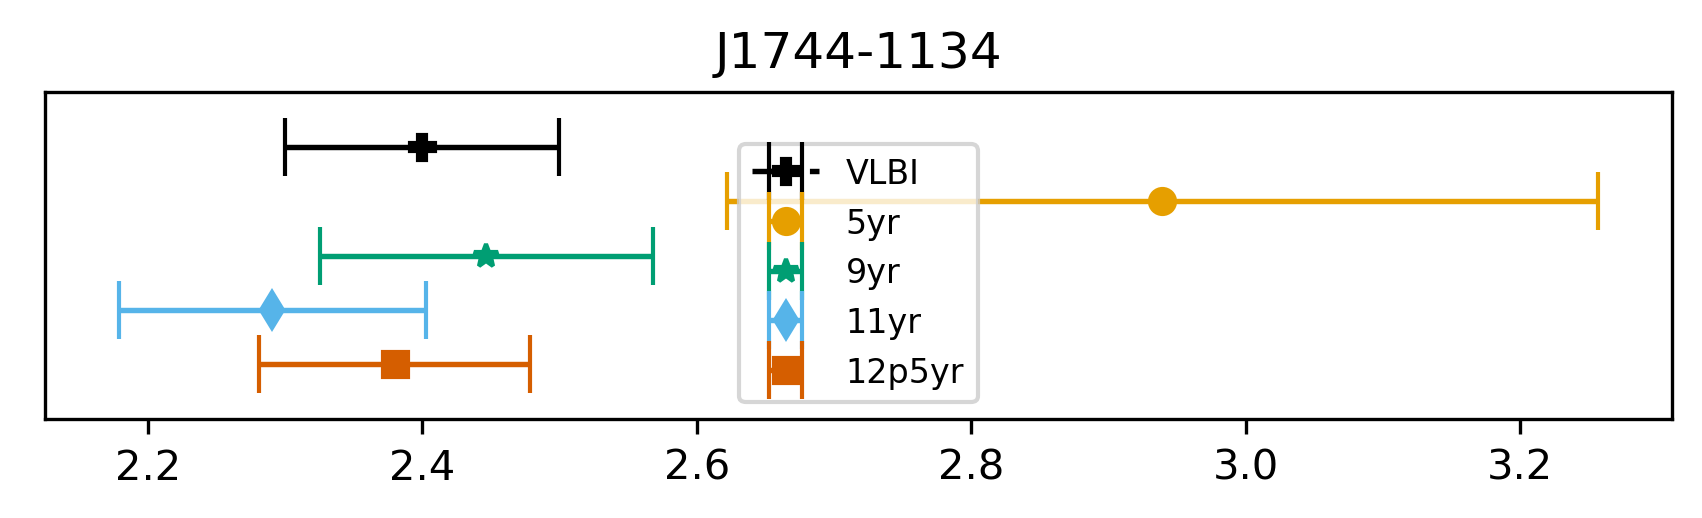

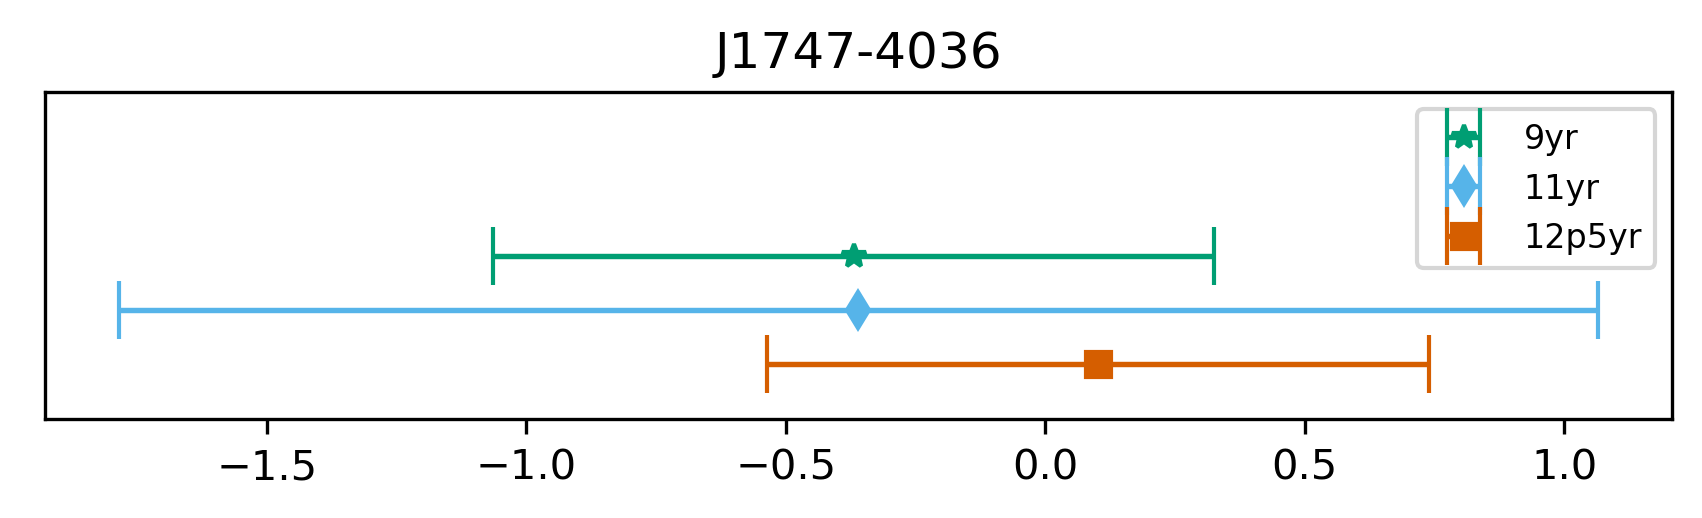

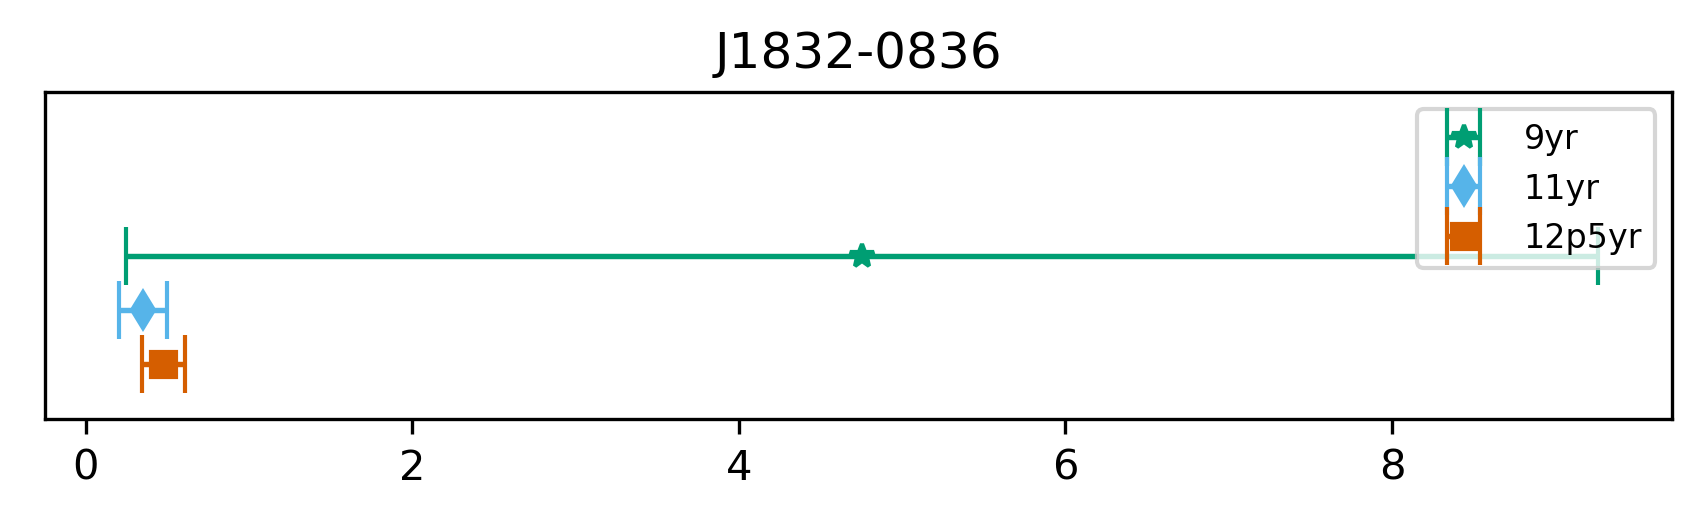

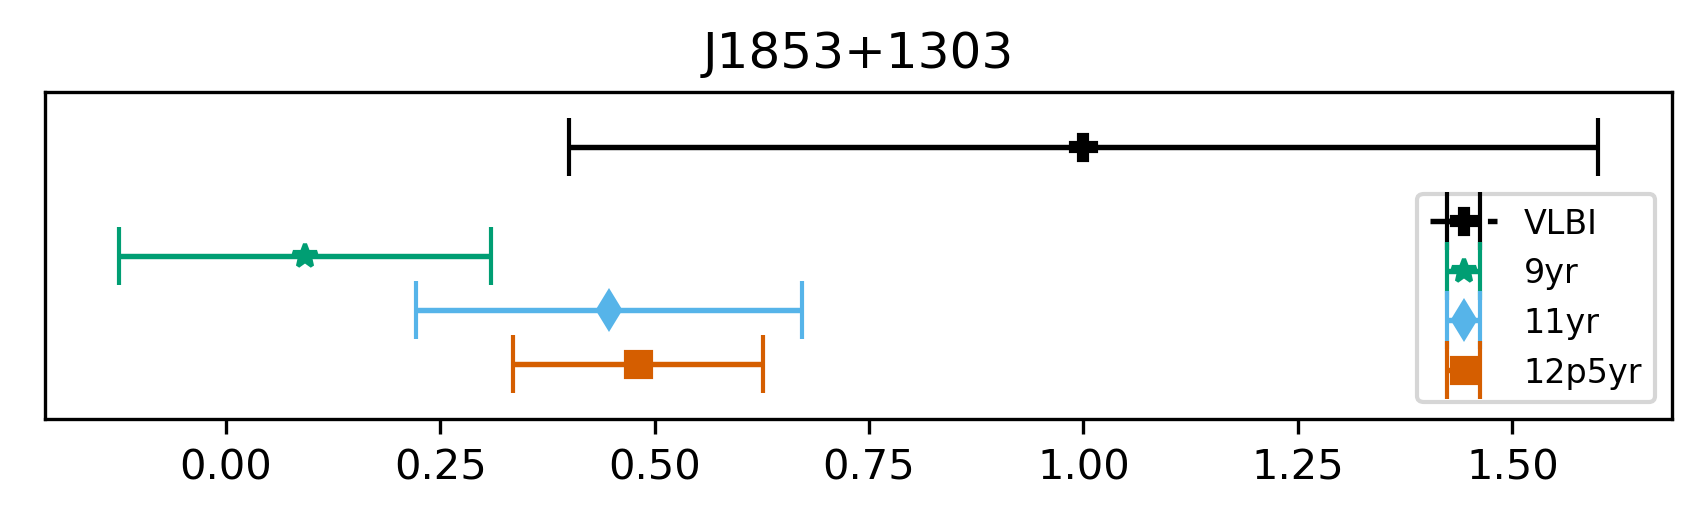

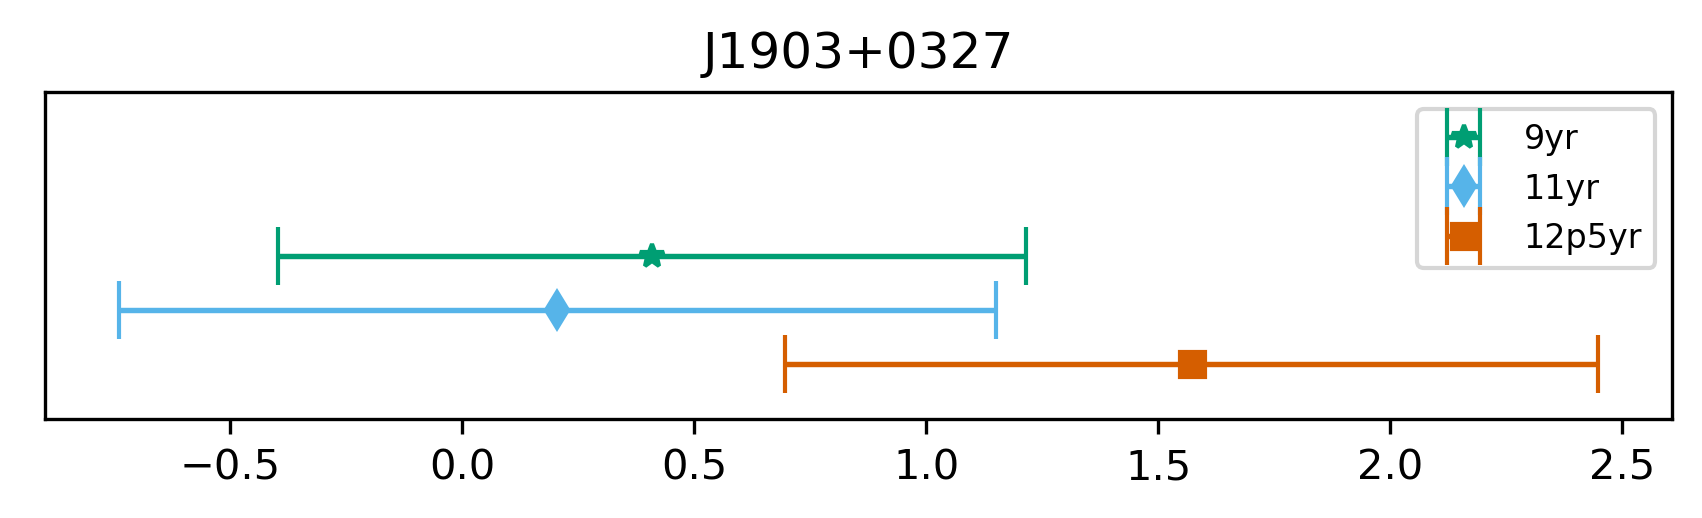

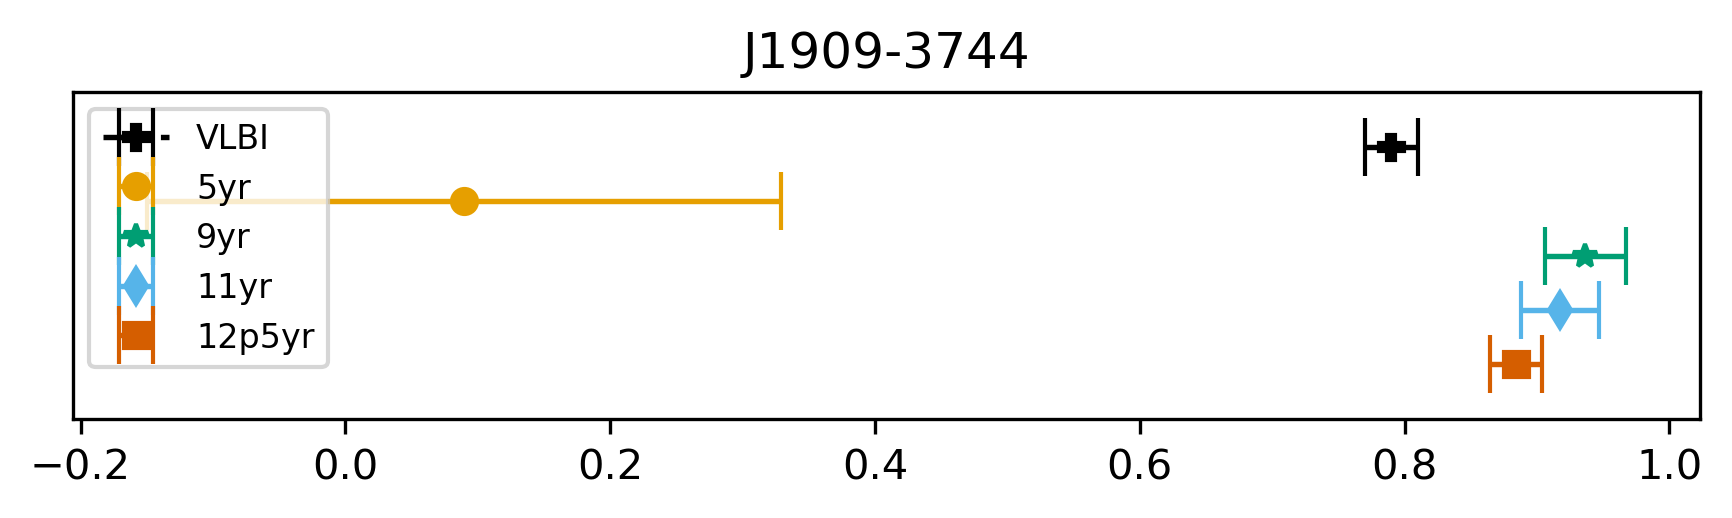

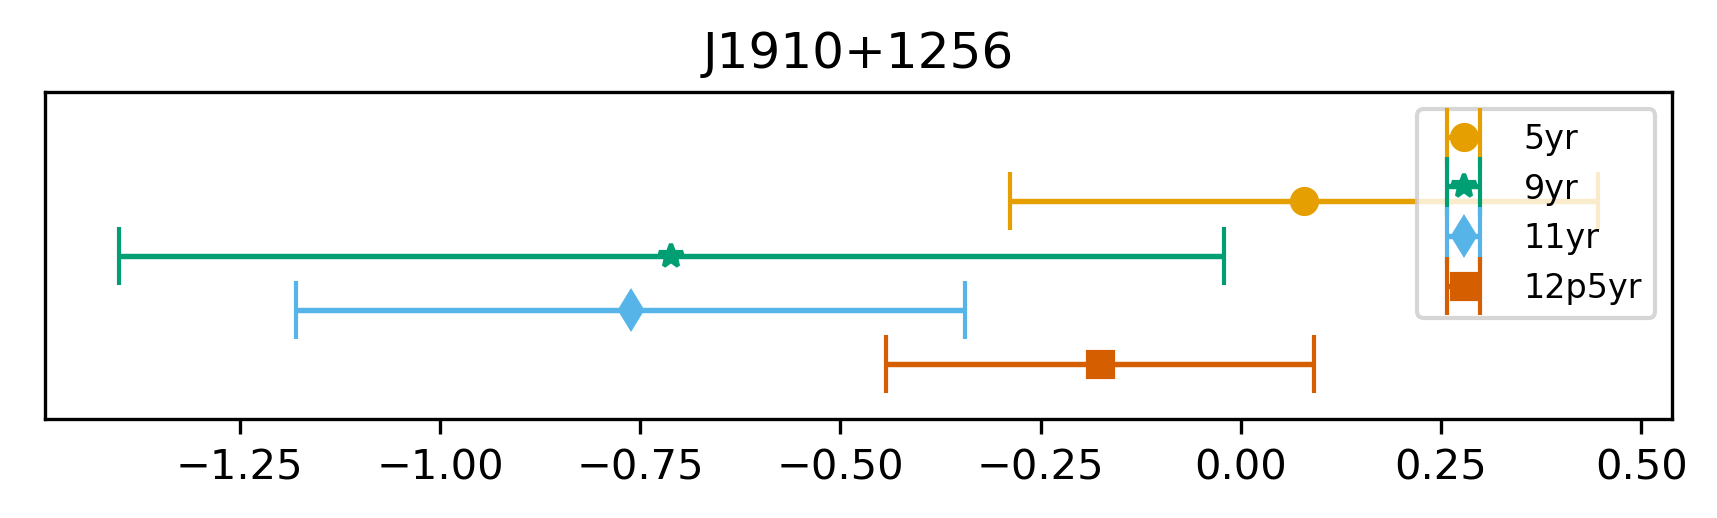

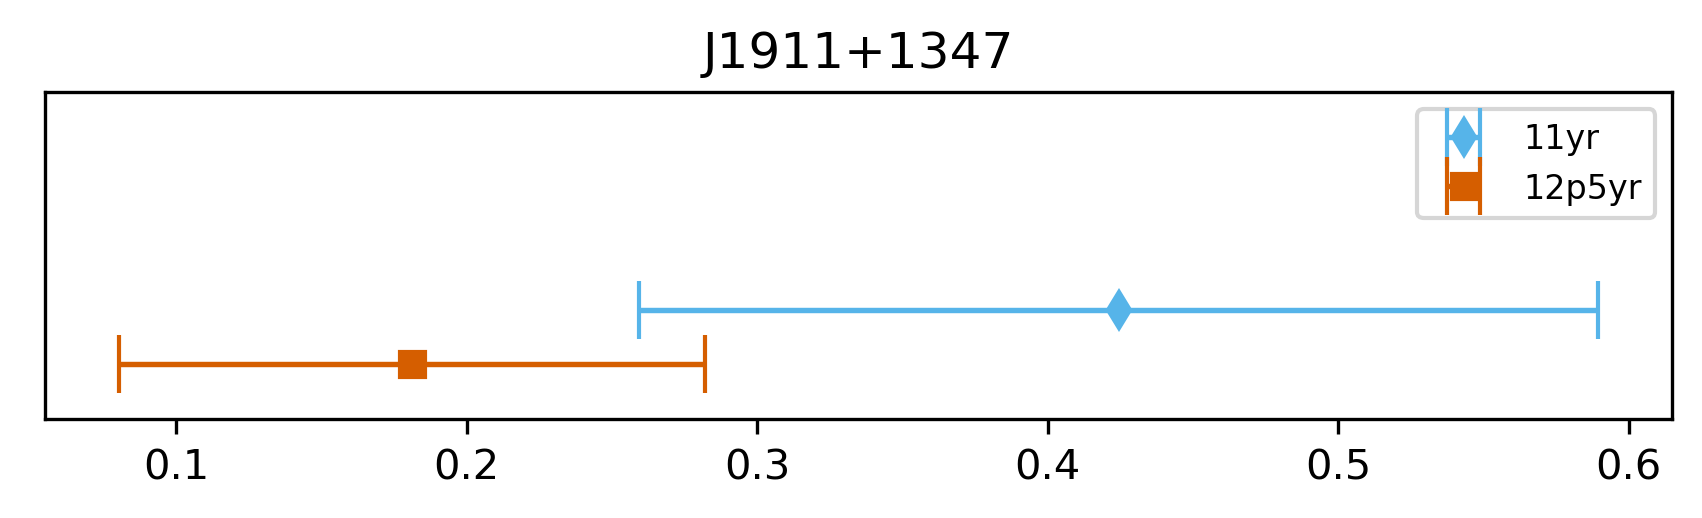

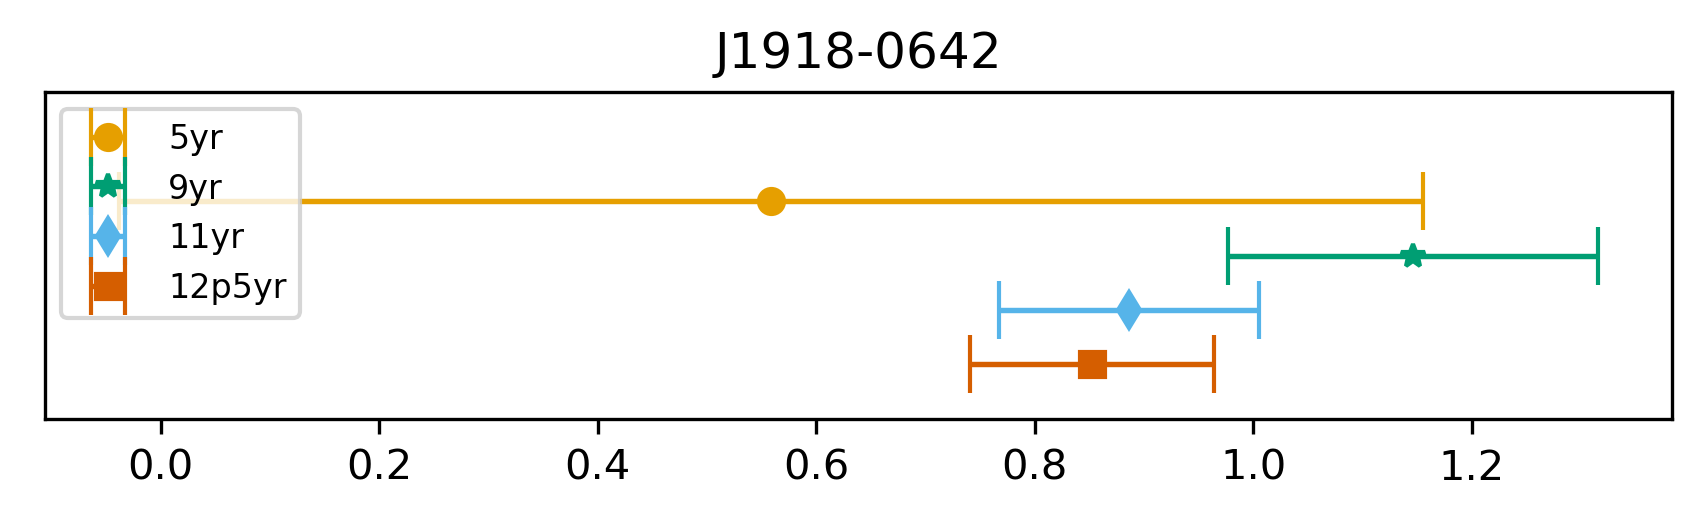

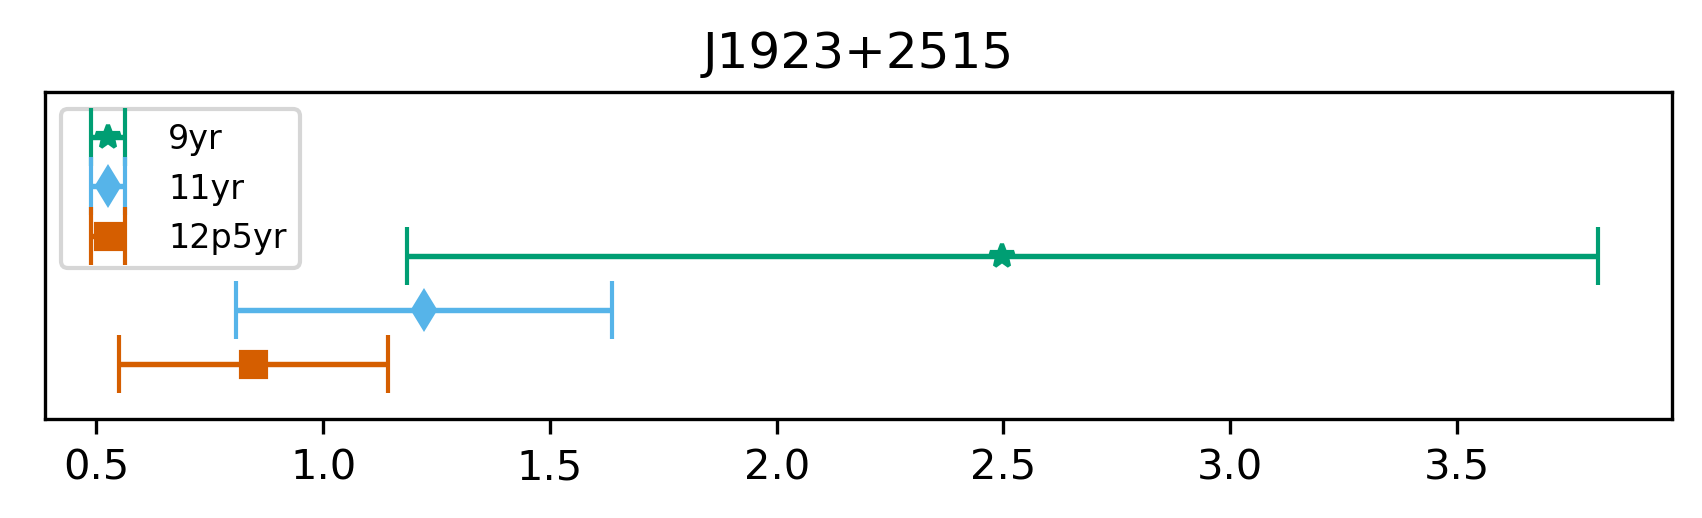

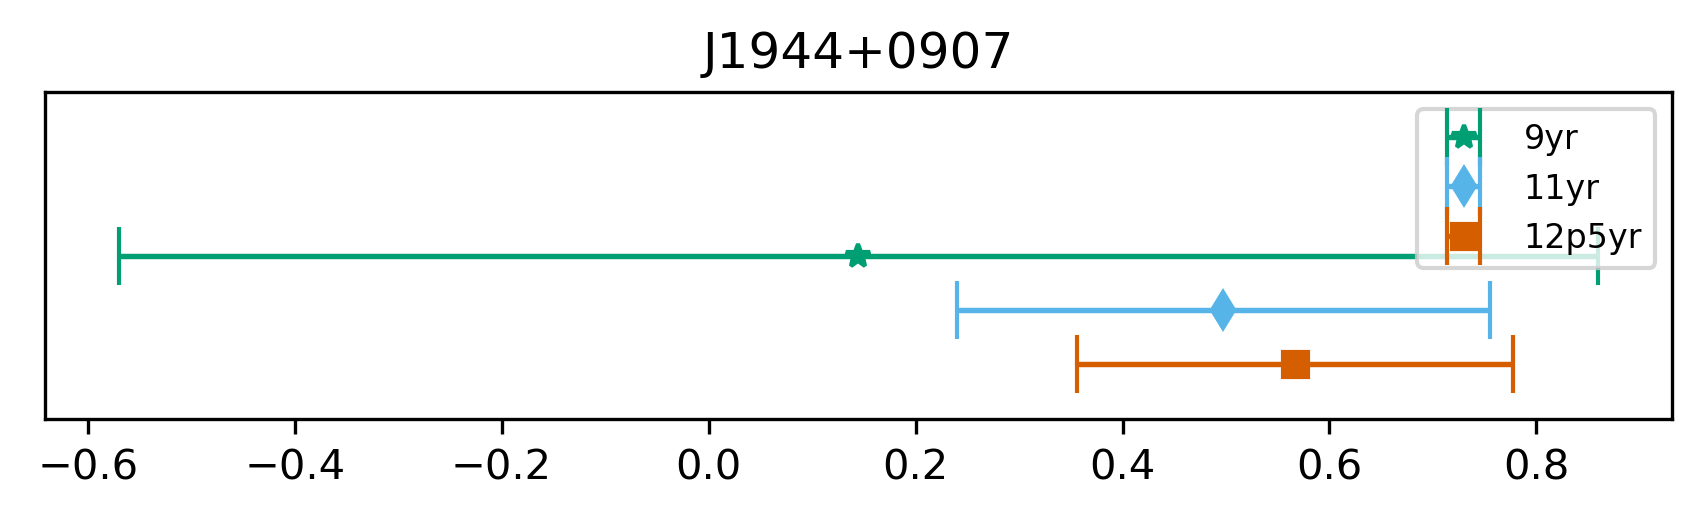

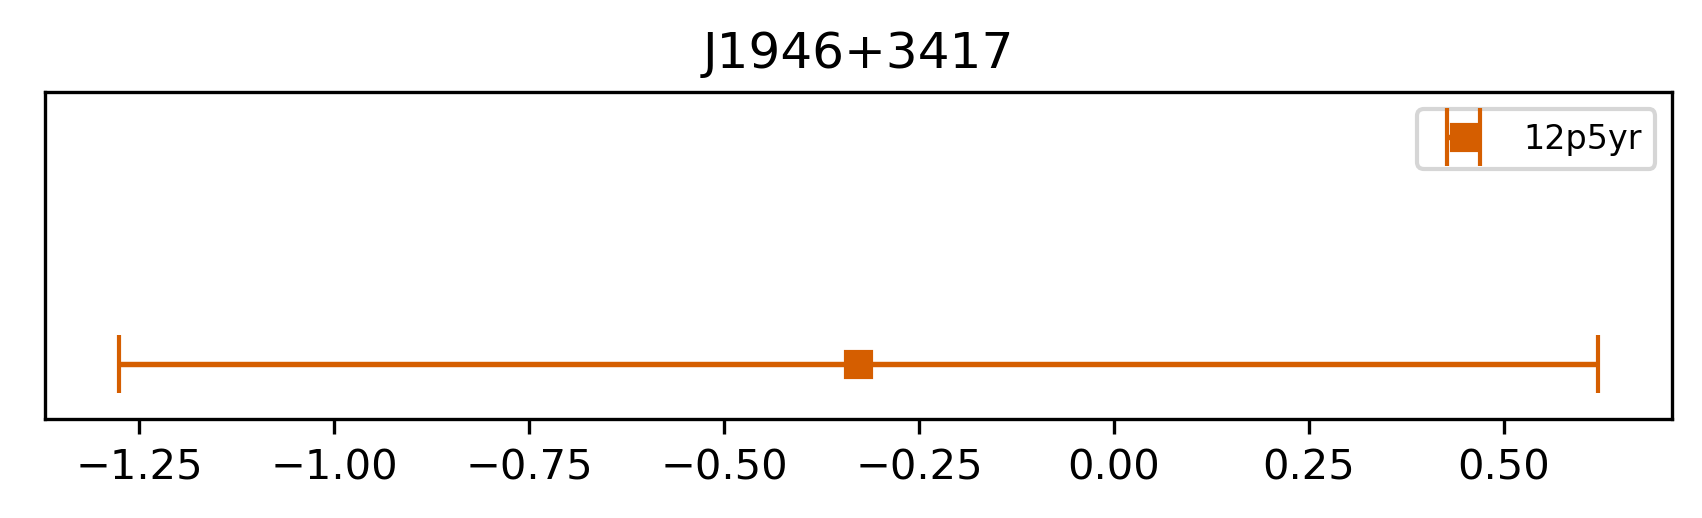

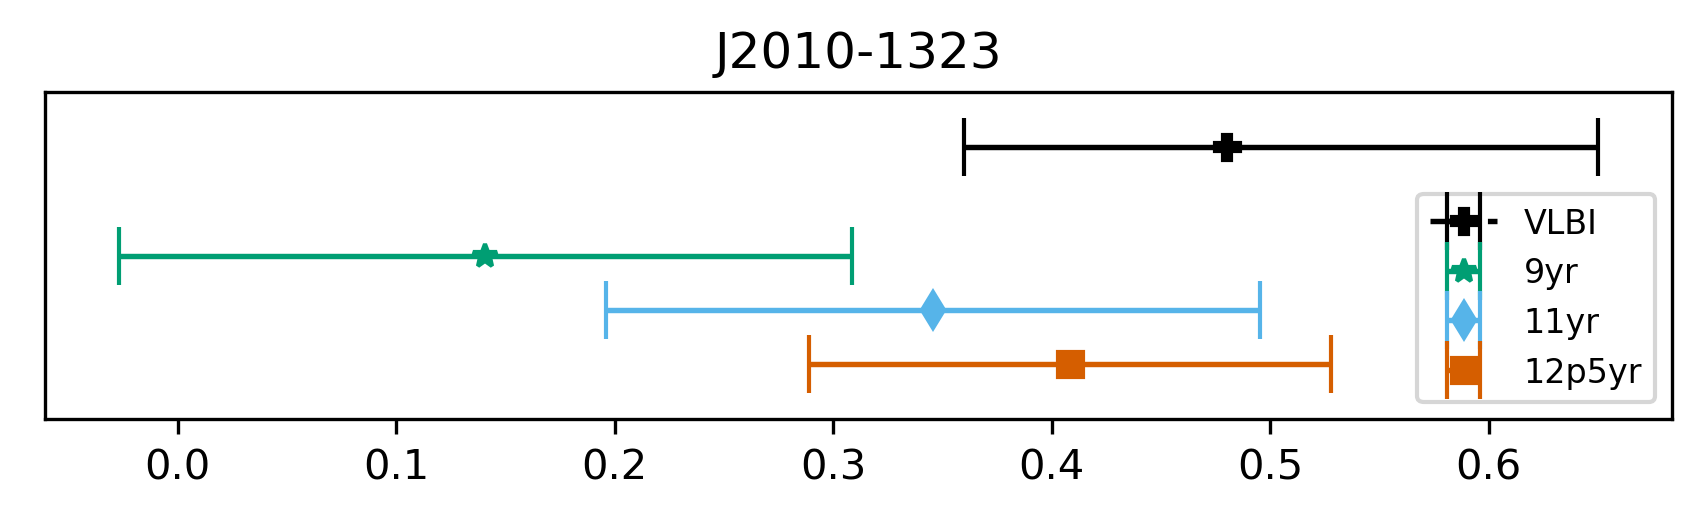

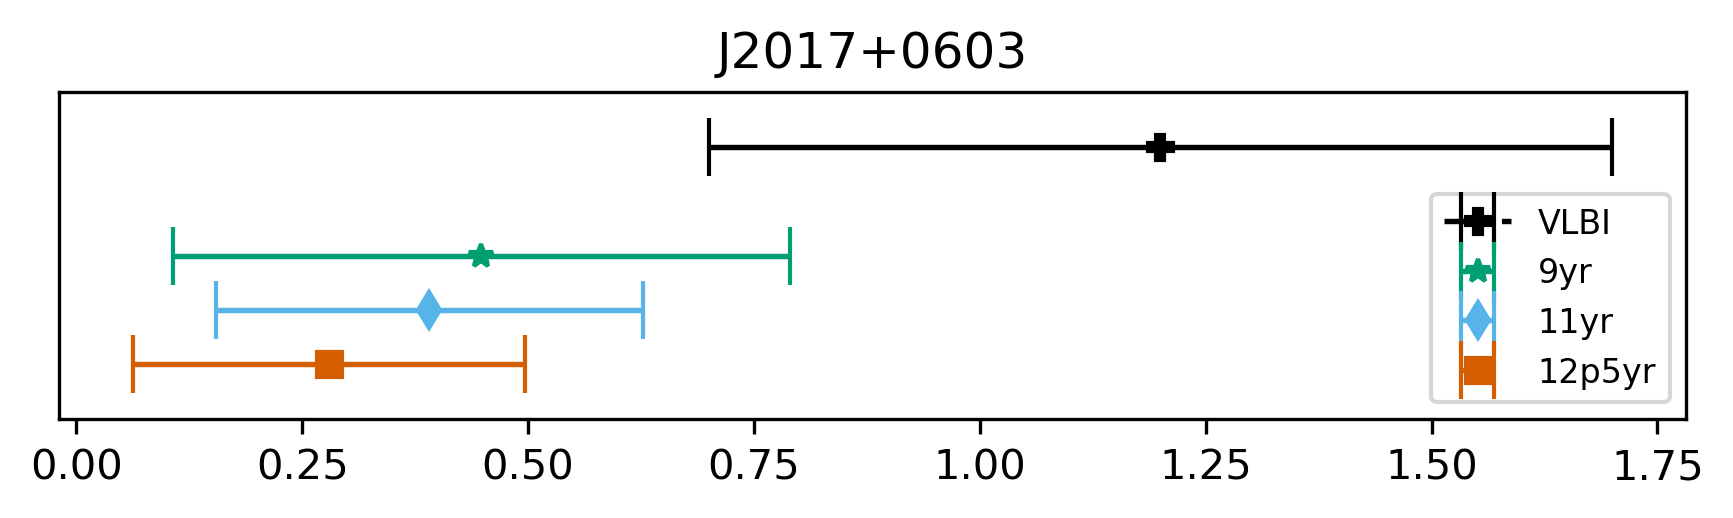

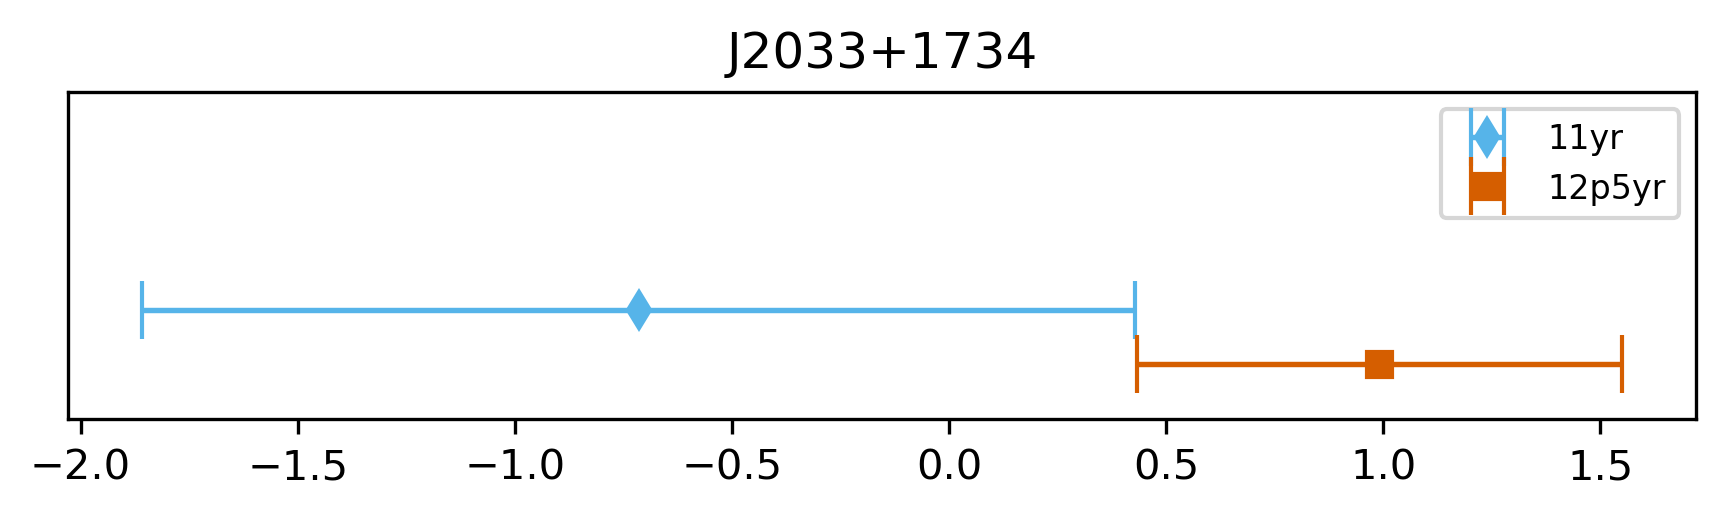

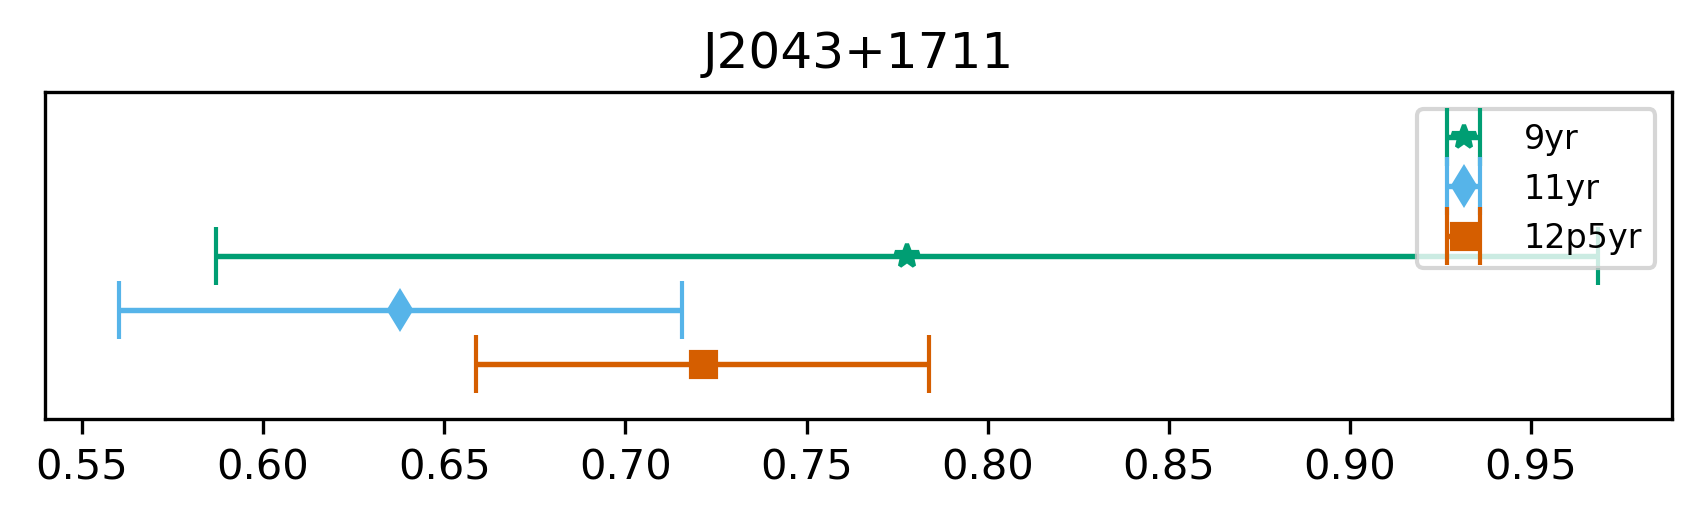

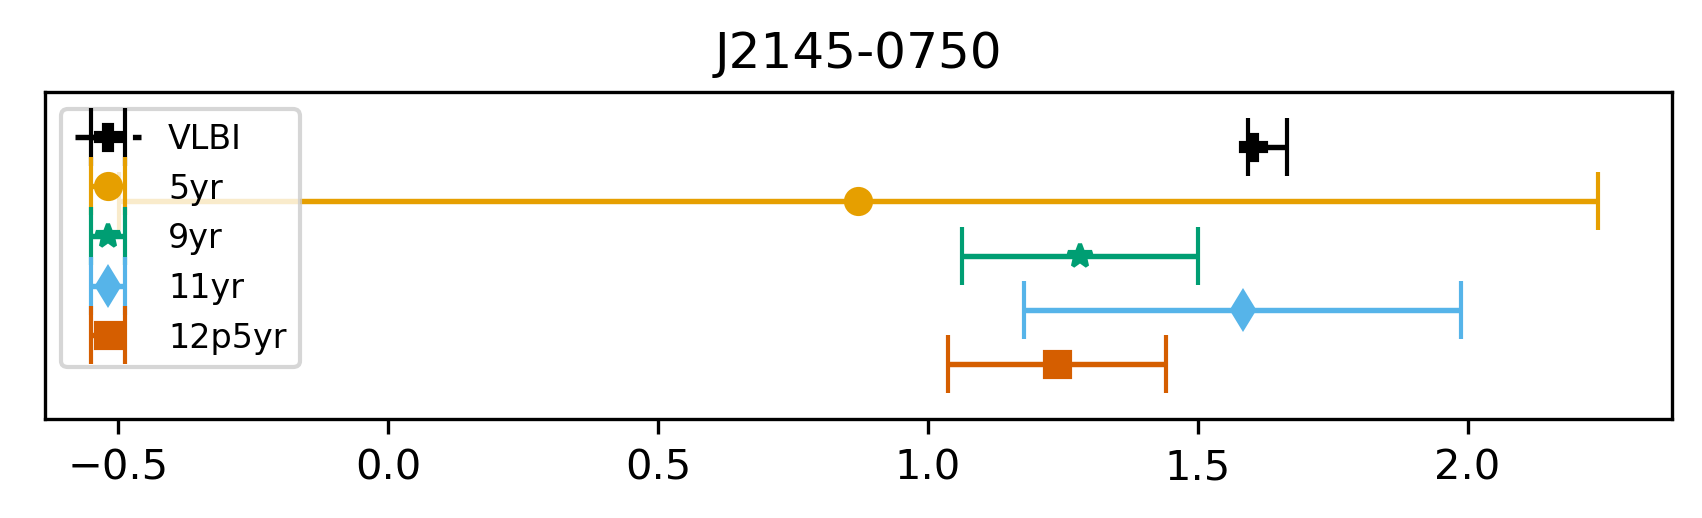

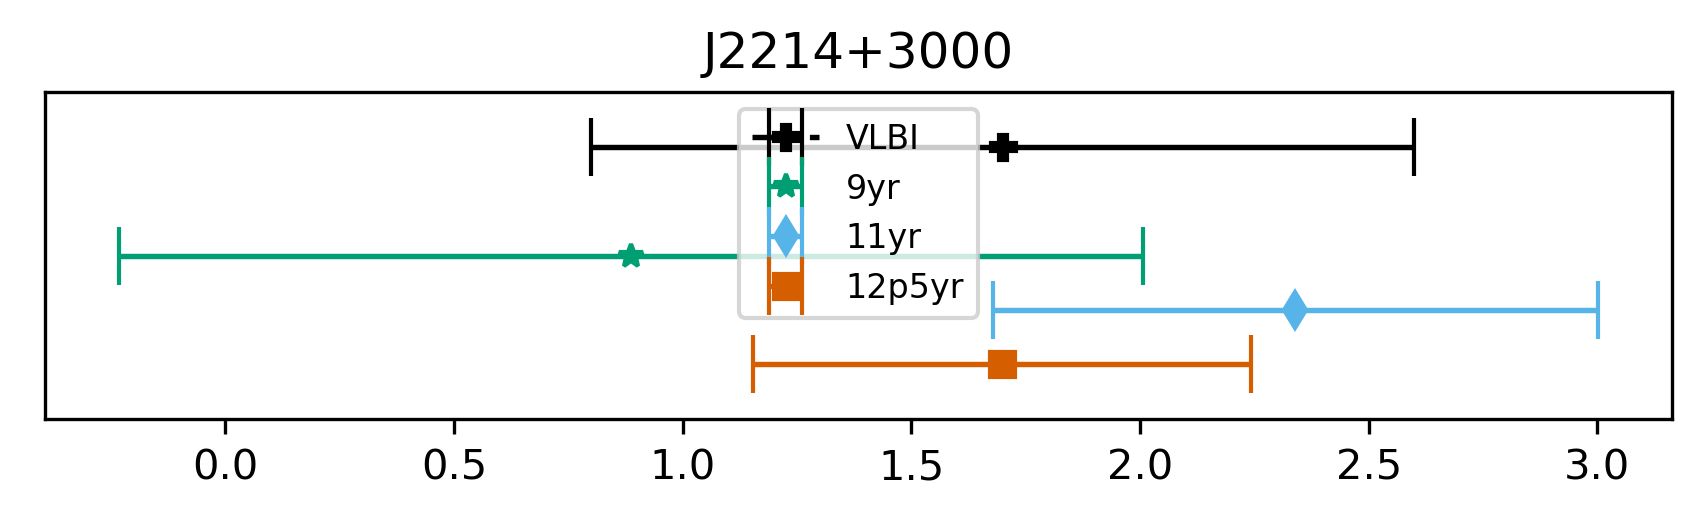

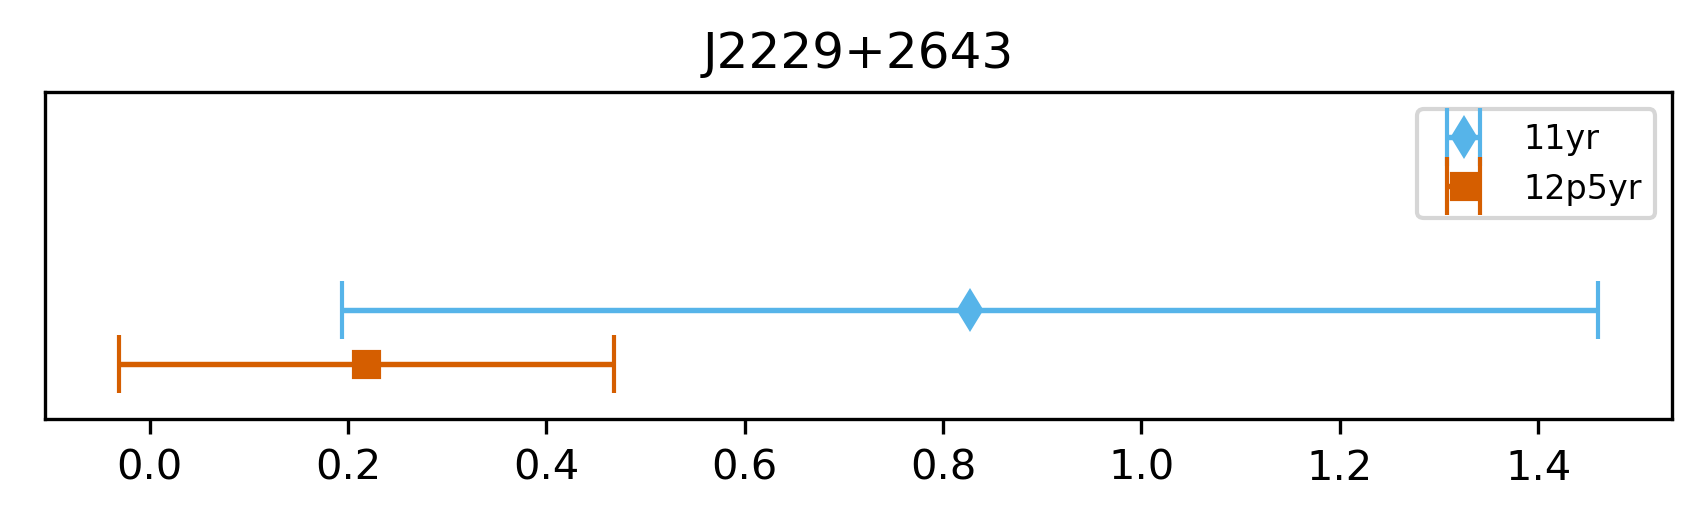

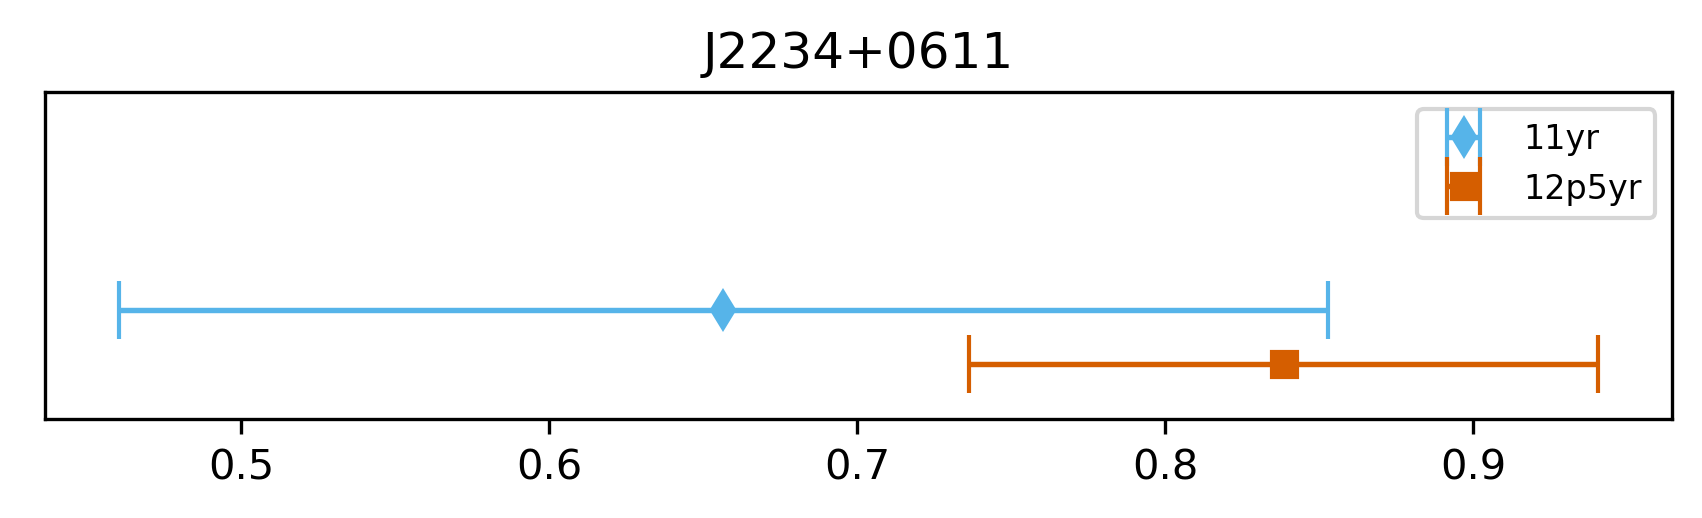

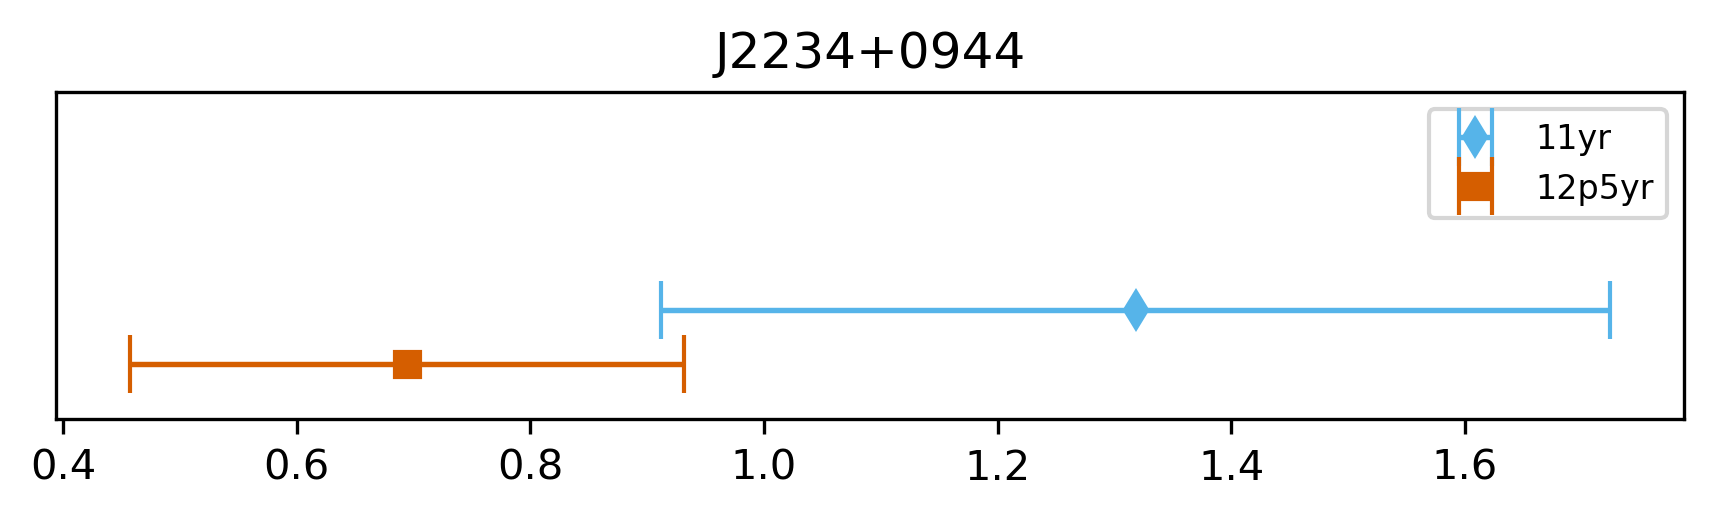

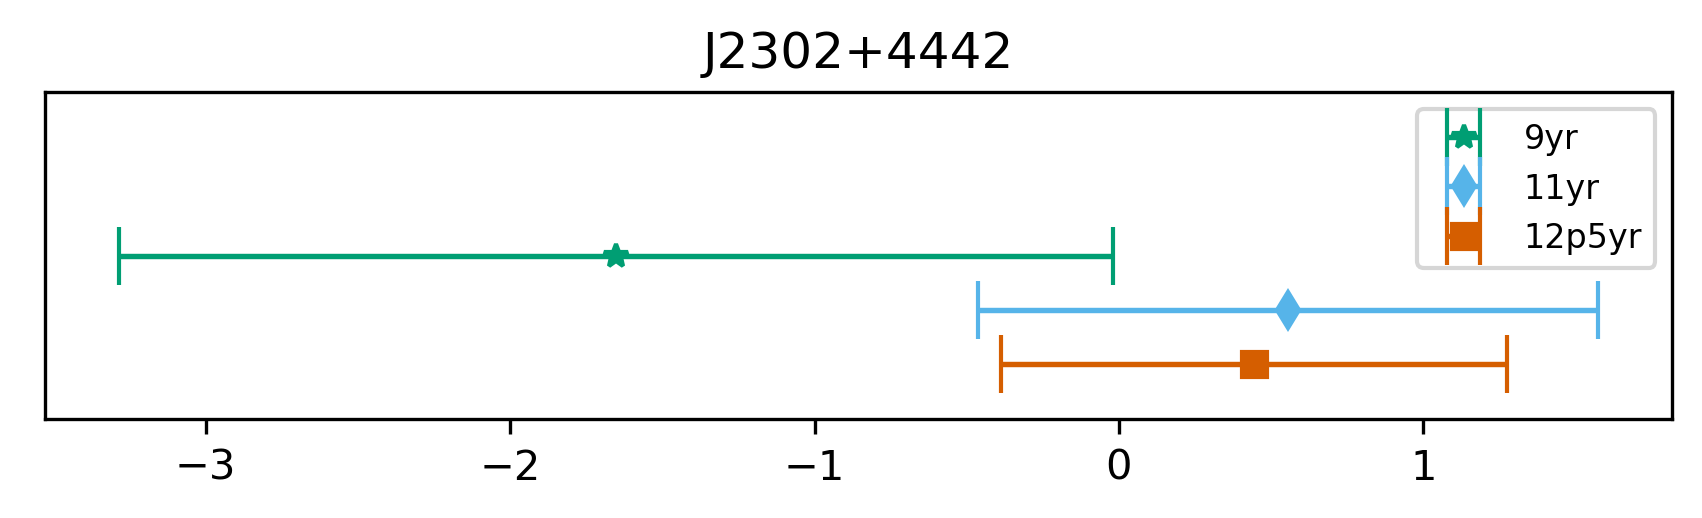

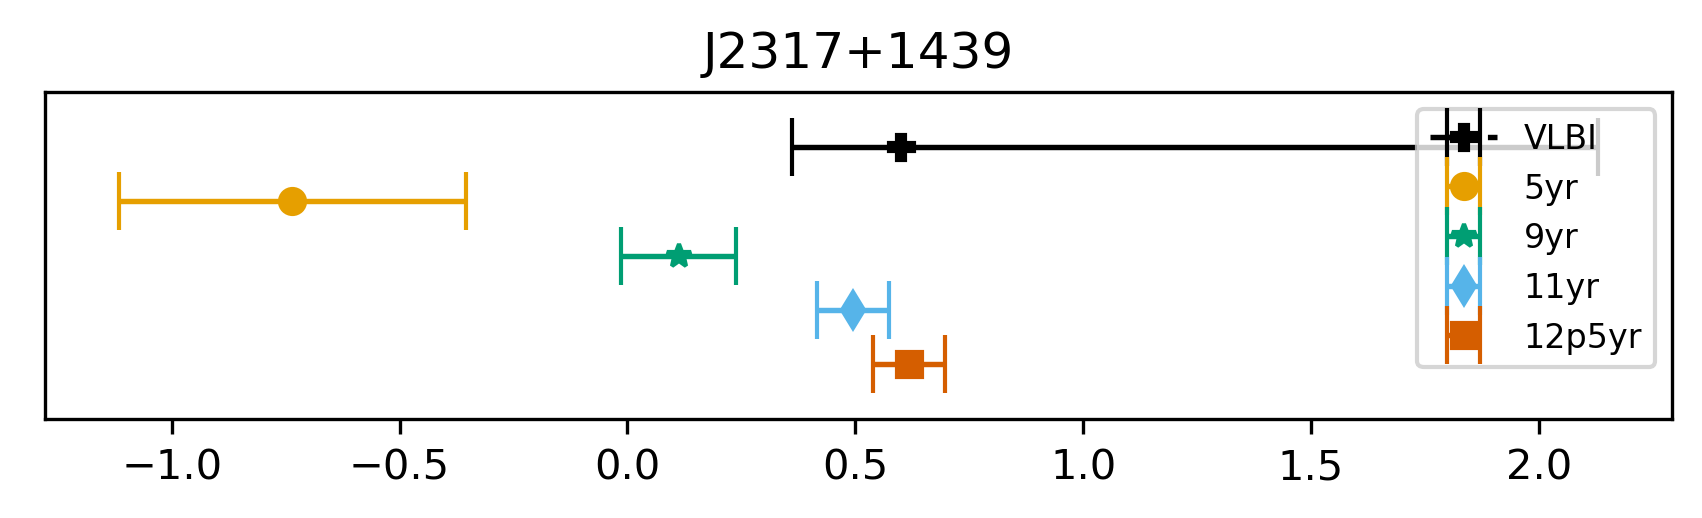

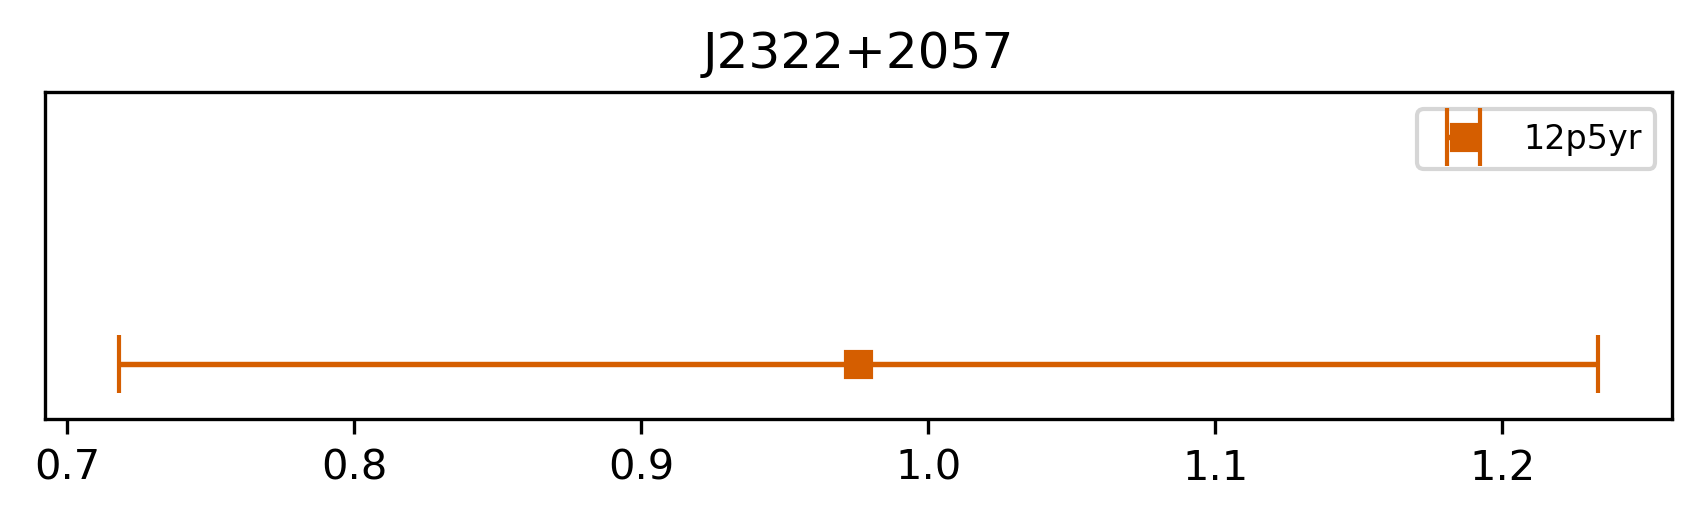

In [ ]:
plotted_psrs = []
capsize = 7
i = 0
for psr in all_psrs:
    fig,ax = plt.subplots(figsize=get_fig_size(scale=3.0))
    ax.set_title(psr)
    
    if psr in astrometric_px.keys():
        ax.errorbar(float(astrometric_px[psr]['PI'][0]),4,
                     xerr=[np.array([np.abs(float(astrometric_px[psr]['eminus'][0]))]),
                           [np.abs(float(astrometric_px[psr]['eplus'][0]))]],
                     fmt = 'P', capsize = capsize, linestyle='--', label = 'VLBI', color = 'C0')
    if psr in px_par_5yr.keys():
        if 'val' in px_par_5yr[psr].keys() and 'err' in px_par_5yr[psr].keys():
            ax.errorbar(px_par_5yr[psr]['val'],3,xerr=px_par_5yr[psr]['err'],
                         fmt = 'o', capsize = capsize, label = '5yr', color = 'C1')
    if psr in px_par_9yr.keys():
        if 'val' in px_par_9yr[psr].keys() and 'err' in px_par_9yr[psr].keys():
            ax.errorbar(px_par_9yr[psr]['val'],2,xerr=px_par_9yr[psr]['err'],
                         fmt = '*', capsize = capsize, label = '9yr', color = 'C2')
    if psr in px_par_11yr.keys():
        if 'val' in px_par_11yr[psr].keys() and 'err' in px_par_11yr[psr].keys():
            ax.errorbar(px_par_11yr[psr]['val'],1,xerr=px_par_11yr[psr]['err'],
                         fmt = 'd', capsize = capsize, label = '11yr', color = 'C3')
    if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            ax.errorbar(px_par_12p5yr[psr]['val'],0,xerr=px_par_12p5yr[psr]['err'],
                         fmt = 's', capsize = capsize, label = '12p5yr', color = 'C6')
    plt.setp(plt.gca(), yticks=())
    plt.ylim([-1,5])
    plt.legend()
    plt.show()

#plt.grid(True, which = 'both')
#plt.subplots_adjust(hspace=.5)
#plt.show()